In [8]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',30000)

In [9]:
df=pd.read_csv('/content/Ds_Data.csv')

In [10]:
#df

In [11]:
print(f'Size of dataset: {df.size}')
print(f'Rows in dataset: {df.shape[0]}')
print(f'Columns in dataset: {df.shape[1]}')

Size of dataset: 317100
Rows in dataset: 12684
Columns in dataset: 25


In [12]:
for i in df.columns:
    print('-'*100)
    print()
    print(f'Unique values in column {i} - {len(set(df[i]))}')
    print()
    print(df[i].value_counts())
    print()

----------------------------------------------------------------------------------------------------

Unique values in column destination - 3

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------

Unique values in column passanger - 4

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------

Unique values in column weather - 3

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------

Unique values in column temperature - 3

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

--------------------------------------------------------------

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [14]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object
has_children,int64


In [15]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [16]:
df.isnull().sum()/df.shape[0]*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000
has_children,0.000000


In [17]:
# dropping car column as it has 99% of null values

df=df.drop(['car'],axis=1)

In [18]:
object_cols=df.select_dtypes(include='object').columns
numerical_cols=df.select_dtypes(include='int64').columns

In [19]:
numerical_cols

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [20]:
object_cols

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [21]:
for i in df.columns:
    print('-'*50)
    print(f'{i}:{df[i].unique()}')

--------------------------------------------------
destination:['No Urgent Place' 'Home' 'Work']
--------------------------------------------------
passanger:['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
--------------------------------------------------
weather:['Sunny' 'Rainy' 'Snowy']
--------------------------------------------------
temperature:[55 80 30]
--------------------------------------------------
coupon:['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
--------------------------------------------------
expiration:['1d' '2h']
--------------------------------------------------
gender:['Female' 'Male']
--------------------------------------------------
age:['21' '46' '26' '31' '41' '50plus' '36' 'below21']
--------------------------------------------------
maritalStatus:['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
--------------------------------------------------
has_children:[1 0]
-------------------------------------

In [22]:
#handling missing values
for i in object_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [24]:
# checking for duplicate records
df.duplicated().sum()

291

In [25]:
# dropping duplicate records
df.drop_duplicates(inplace=True,ignore_index=True)

In [26]:
# verifying for duplicate records
df.duplicated().sum()

0

Plotting graphs for analysis

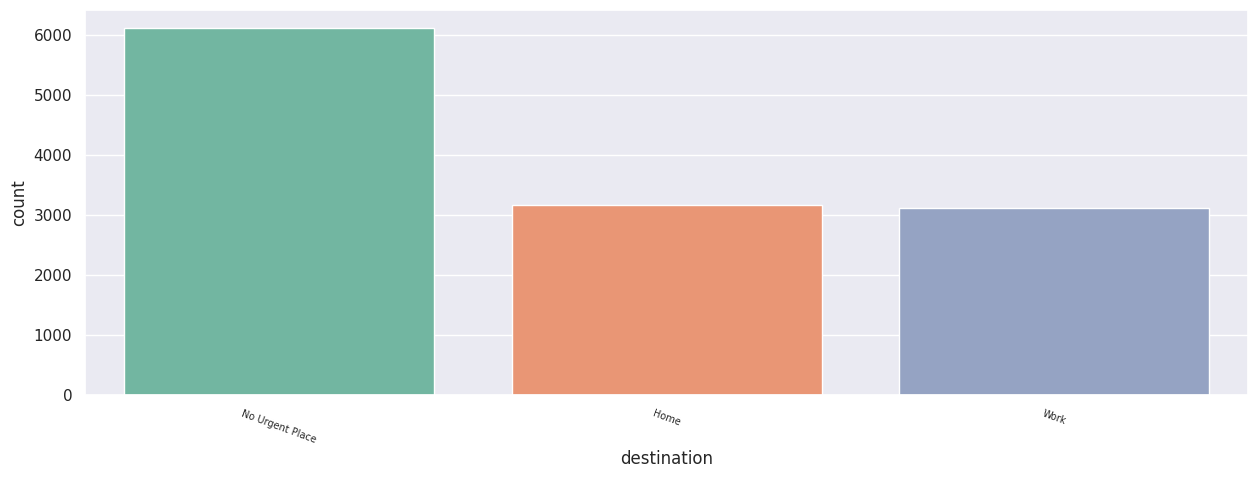

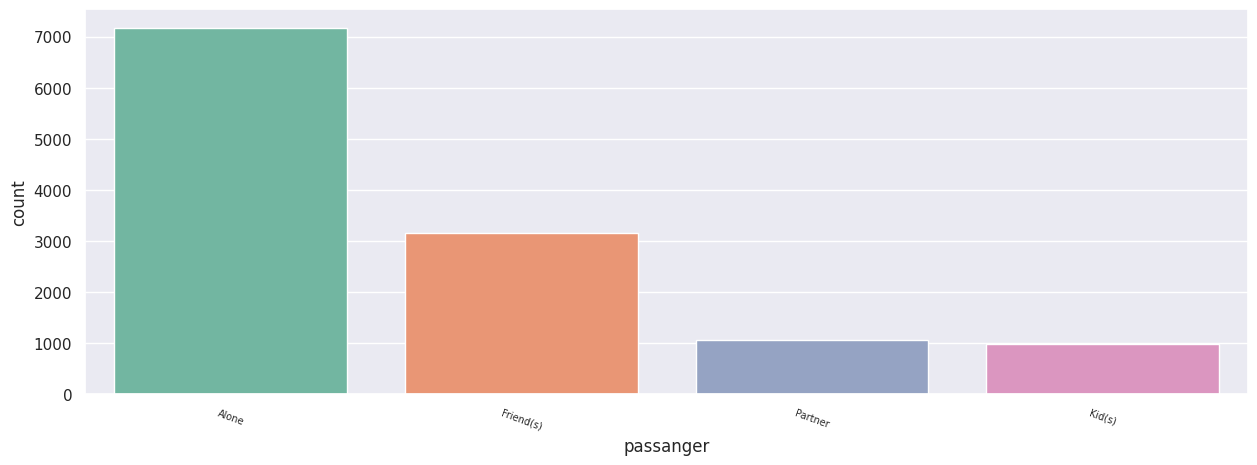

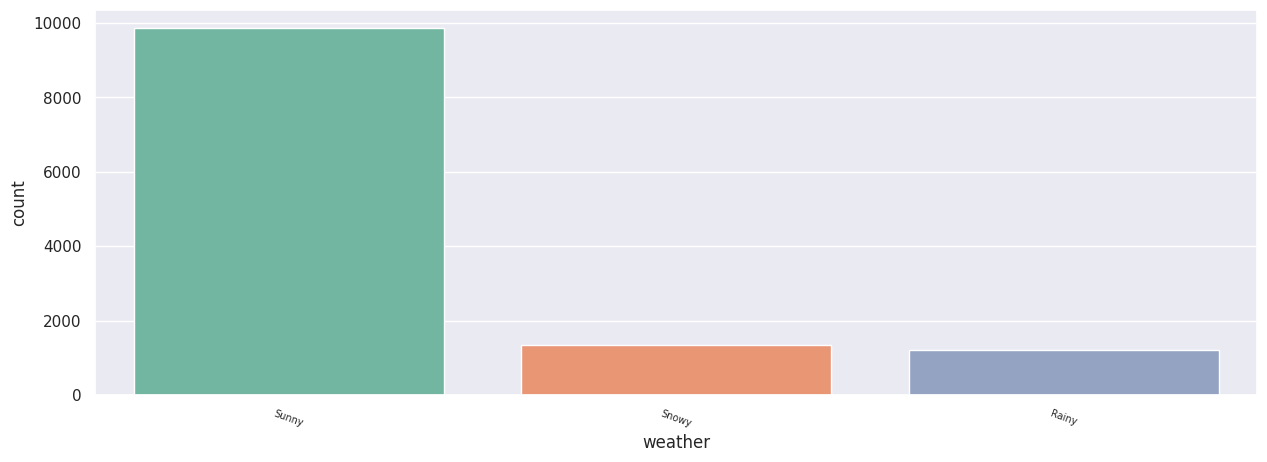

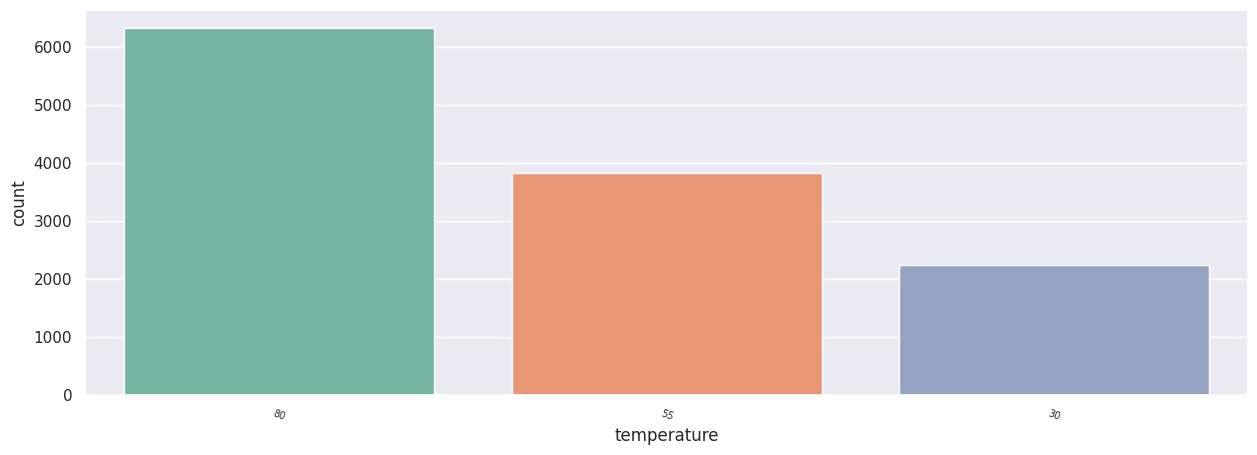

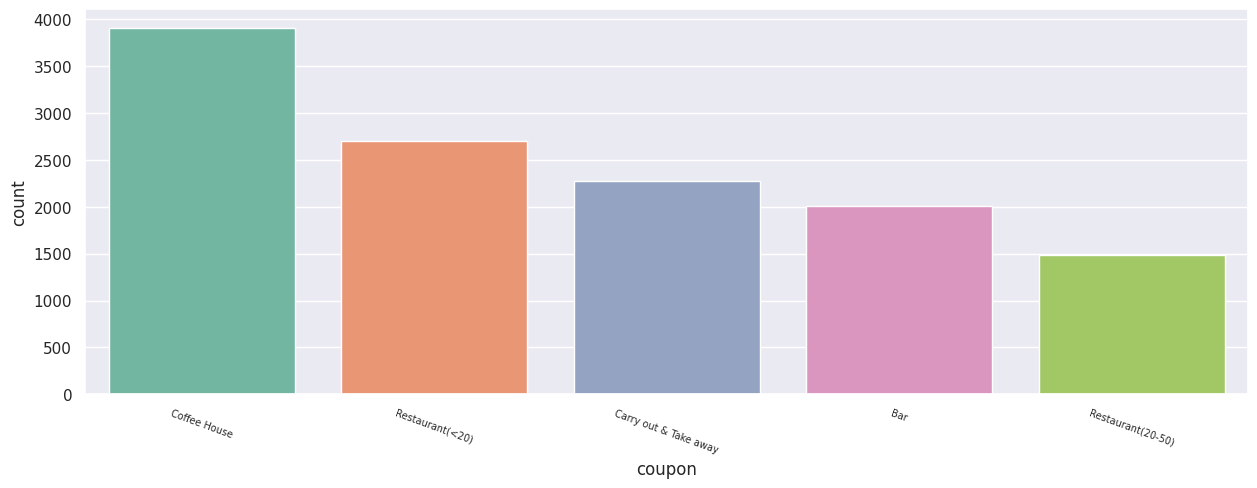

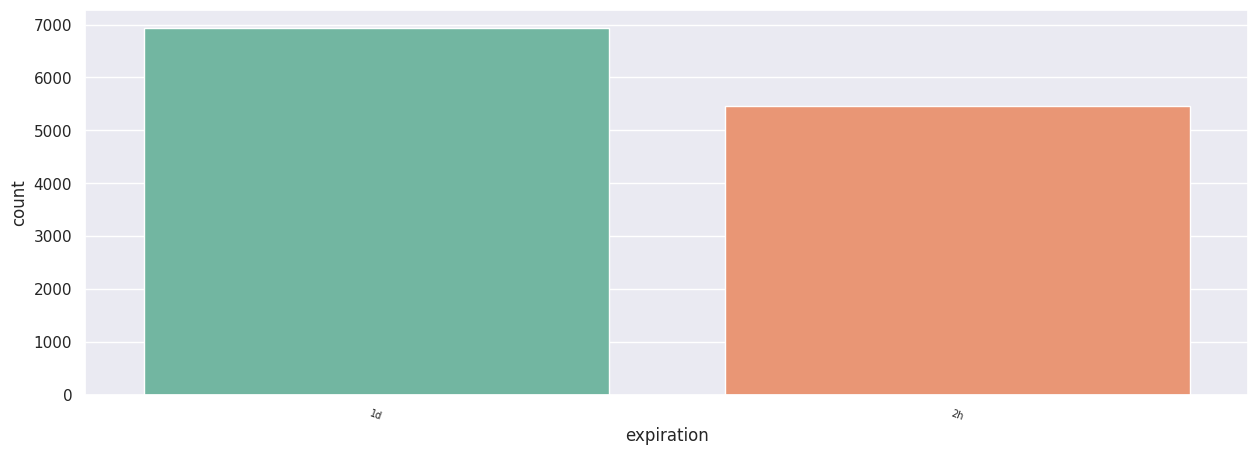

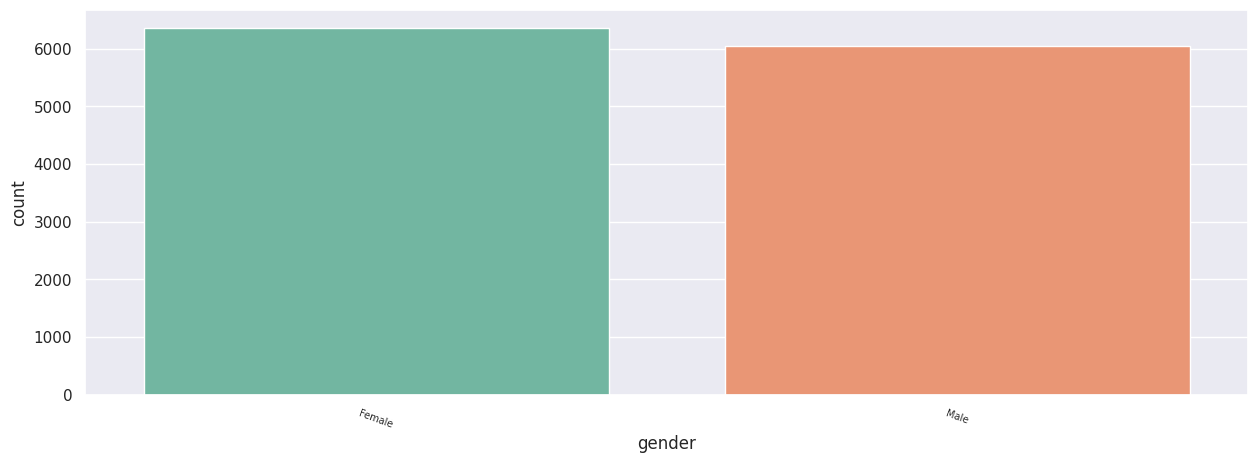

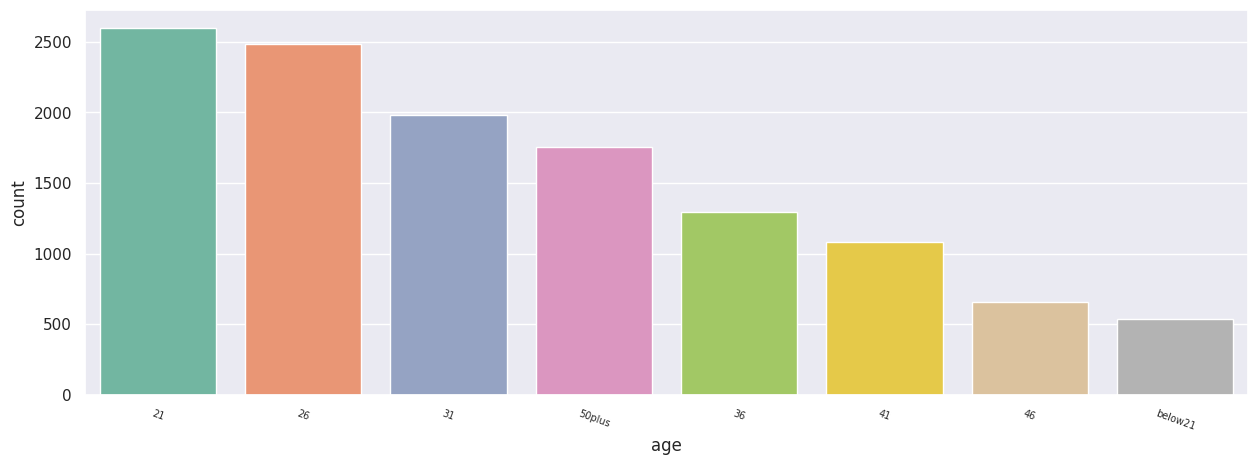

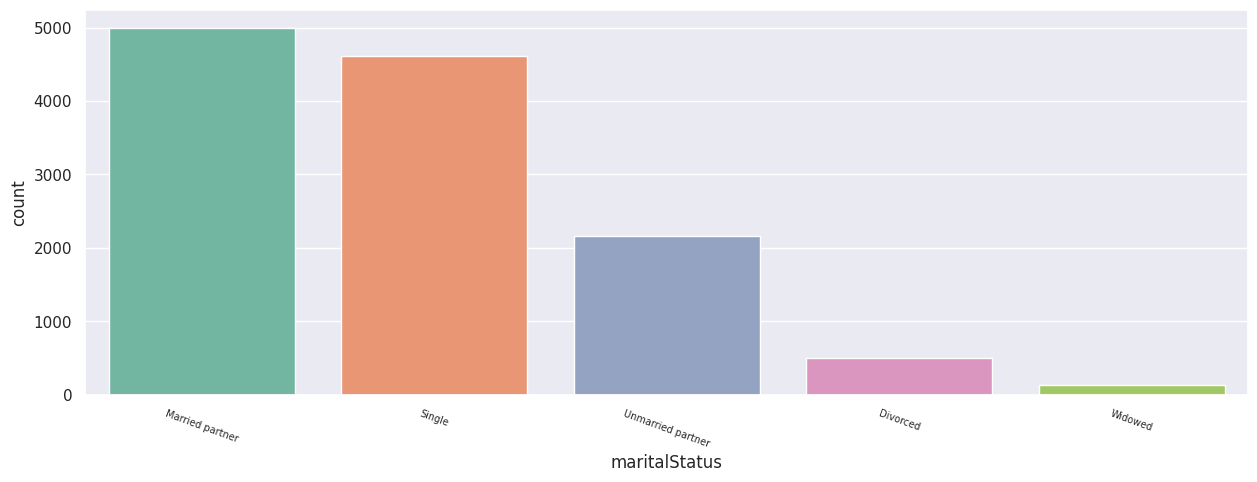

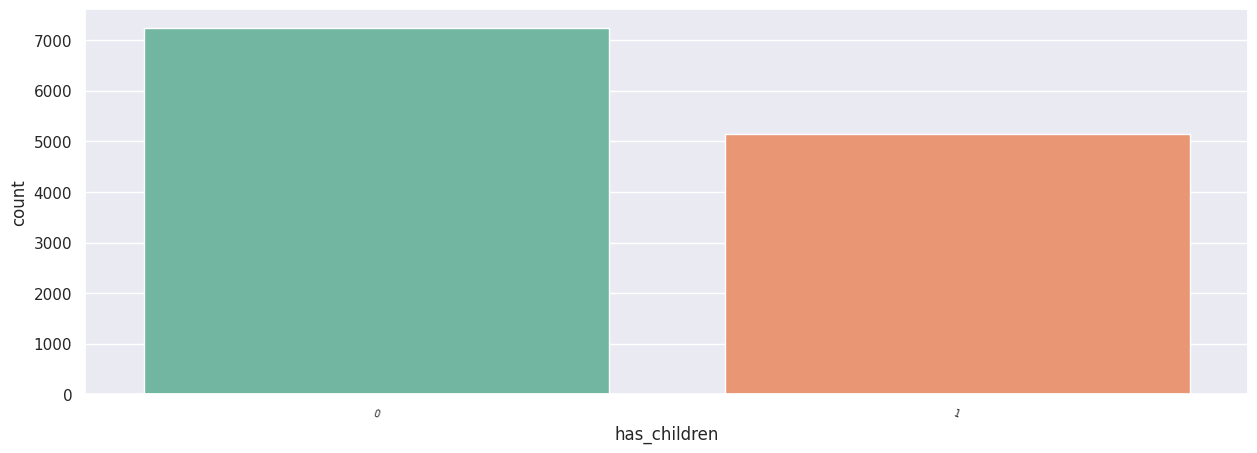

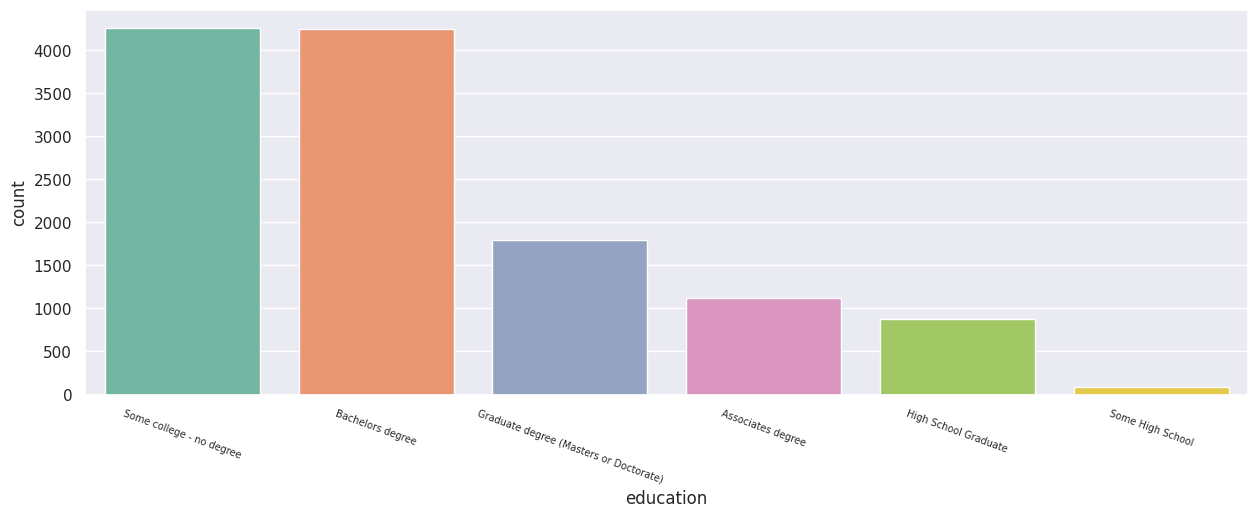

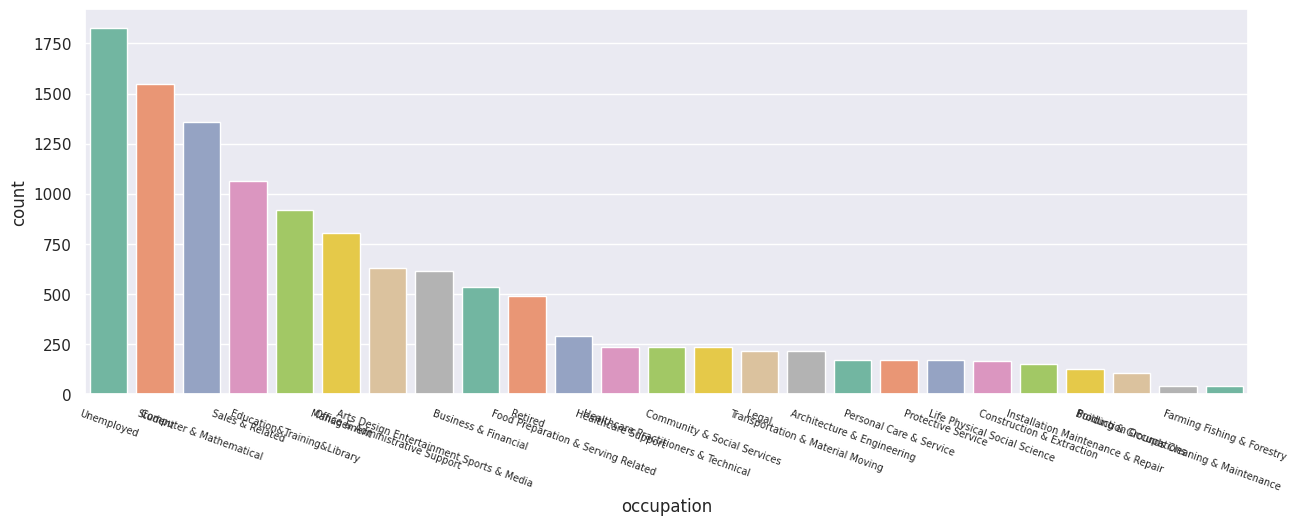

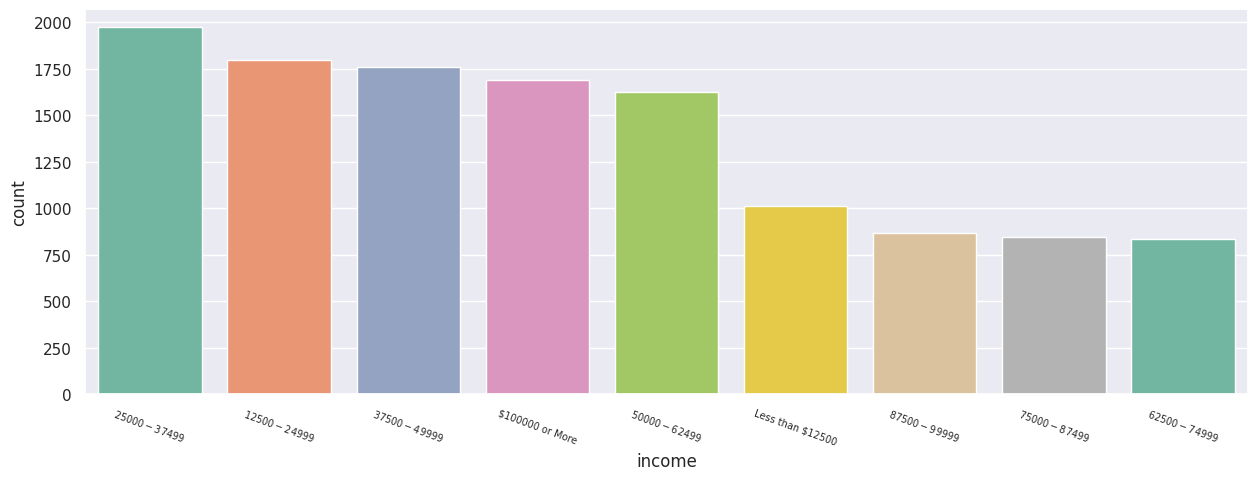

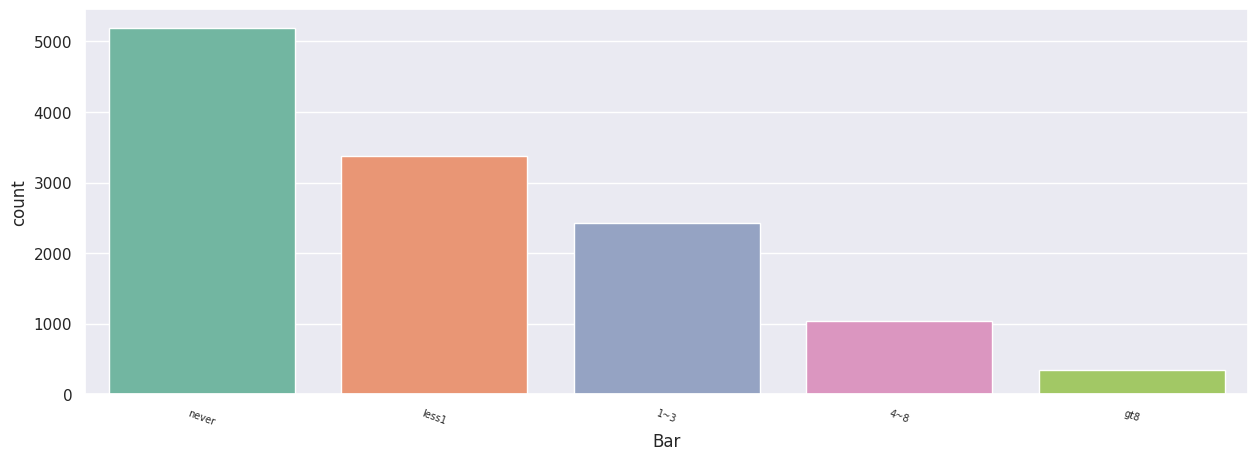

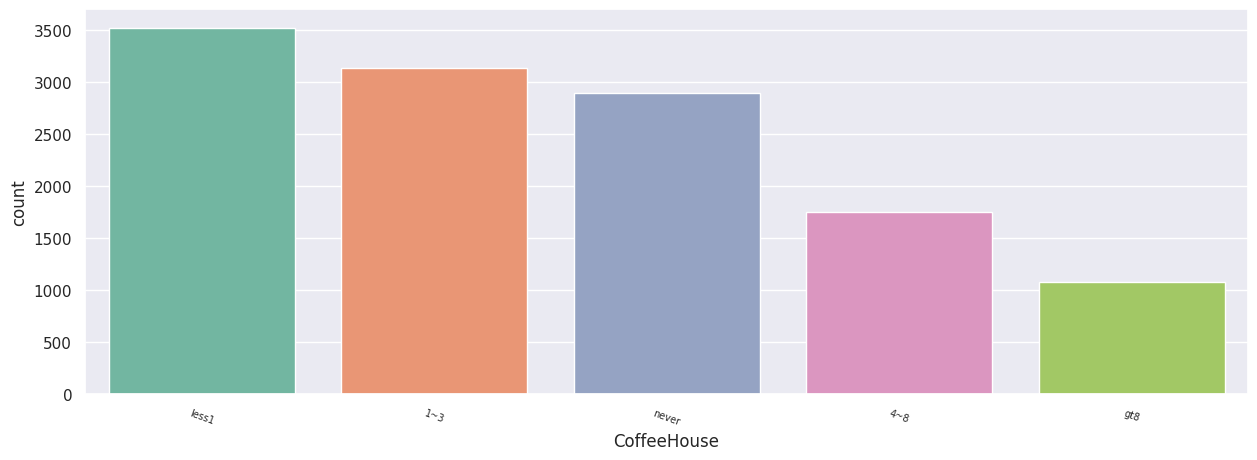

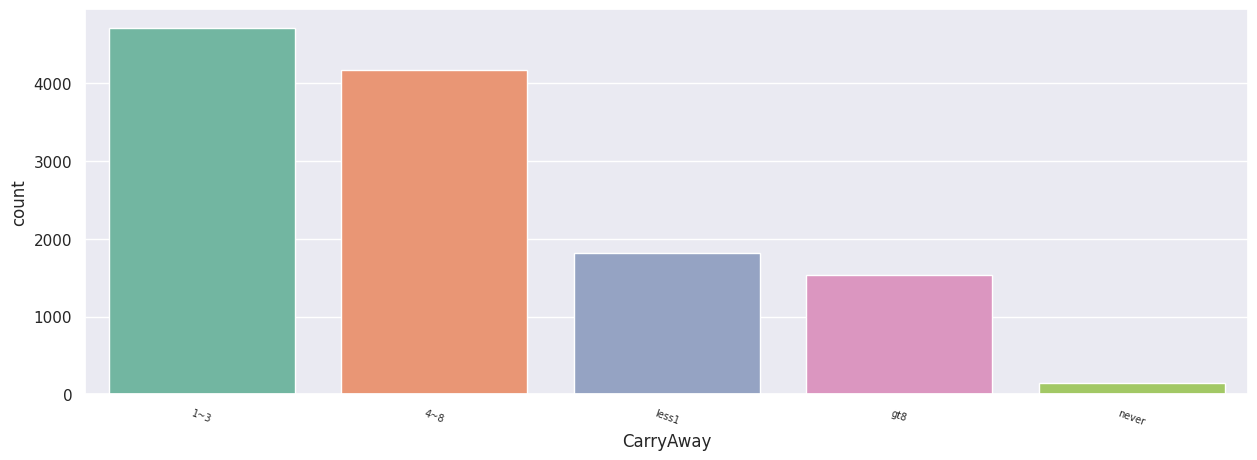

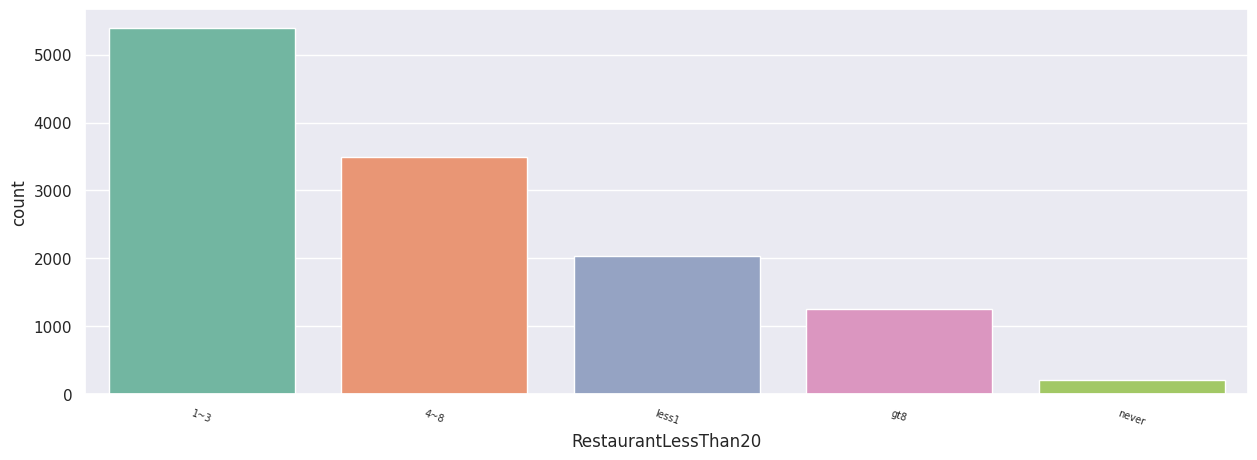

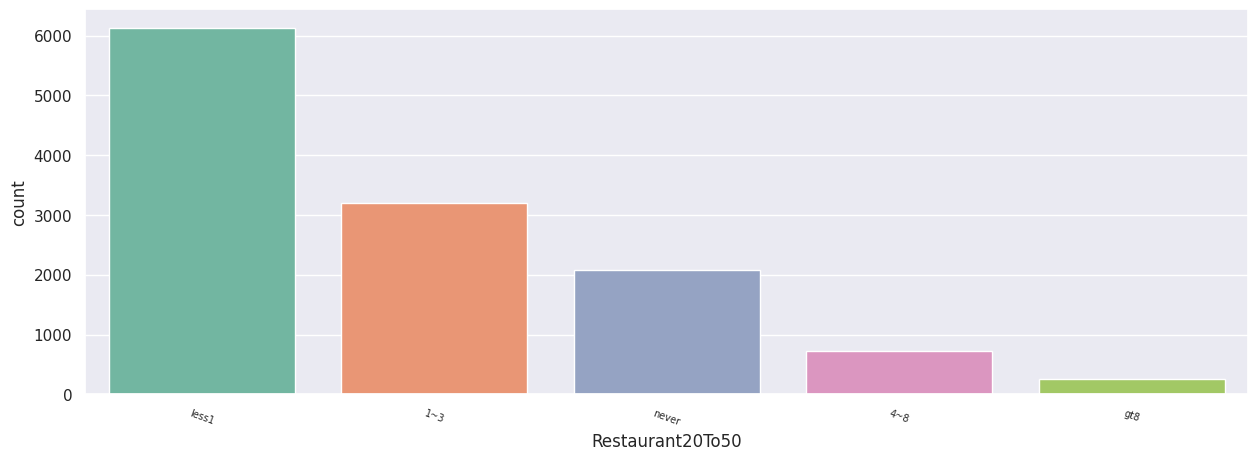

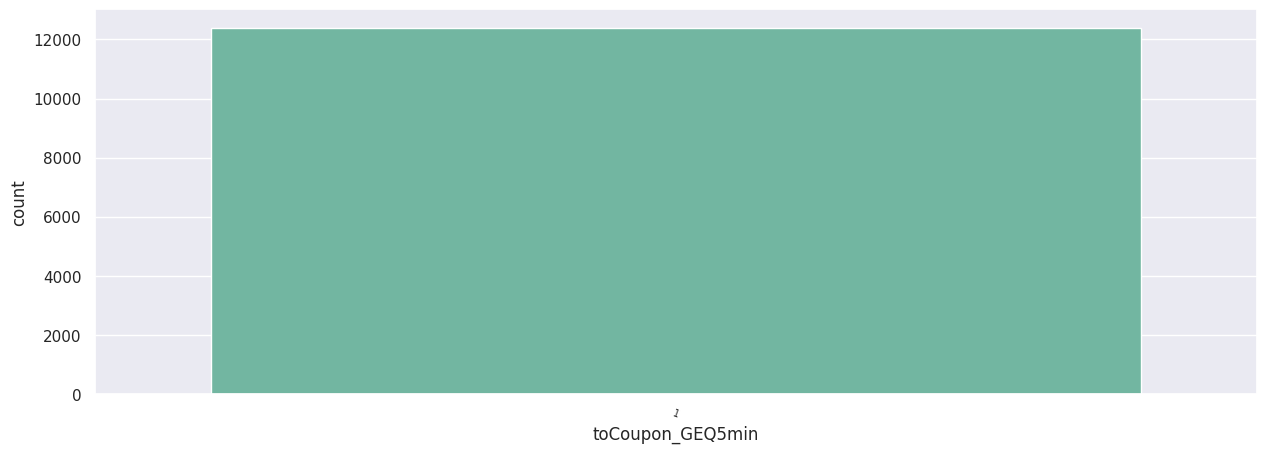

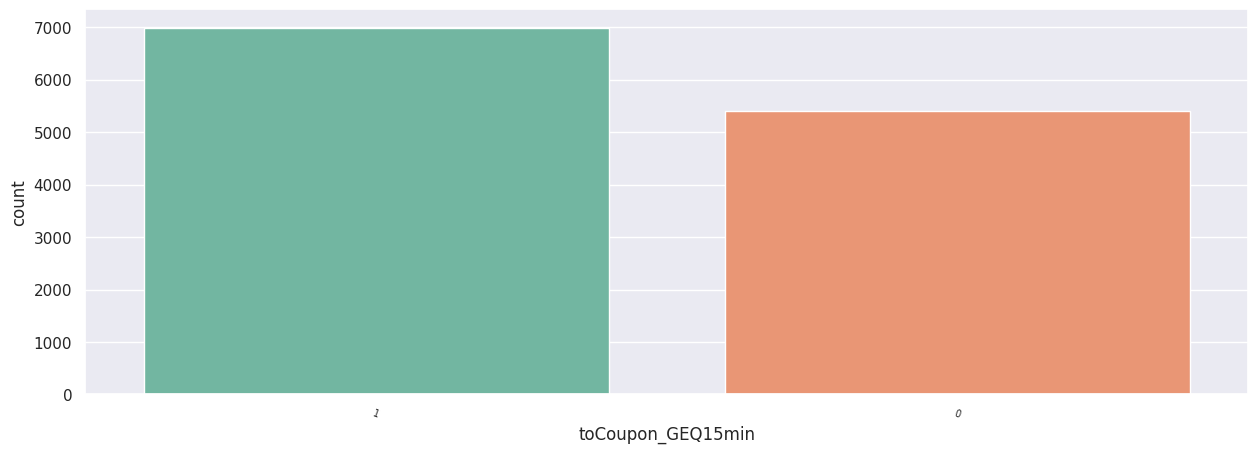

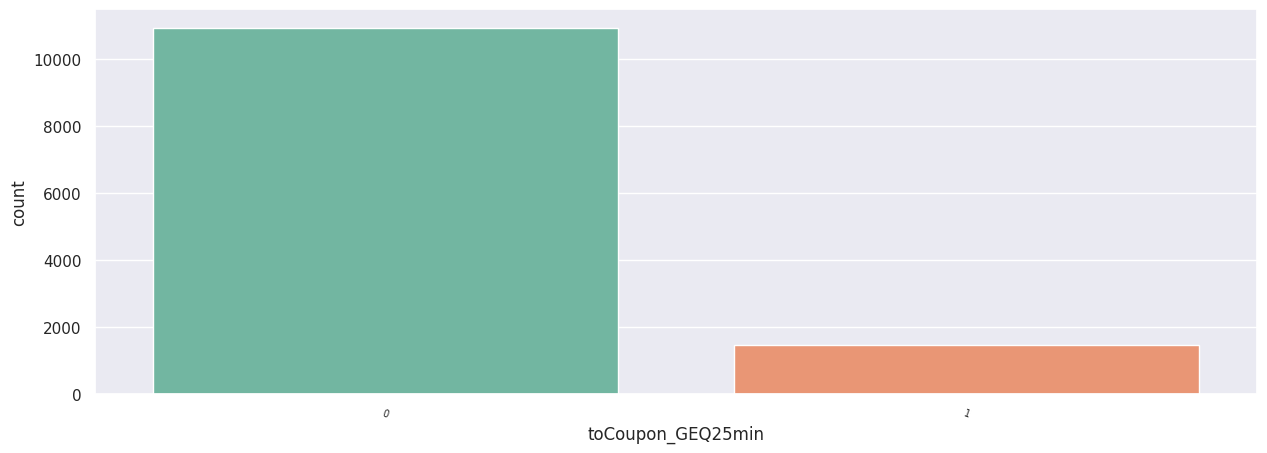

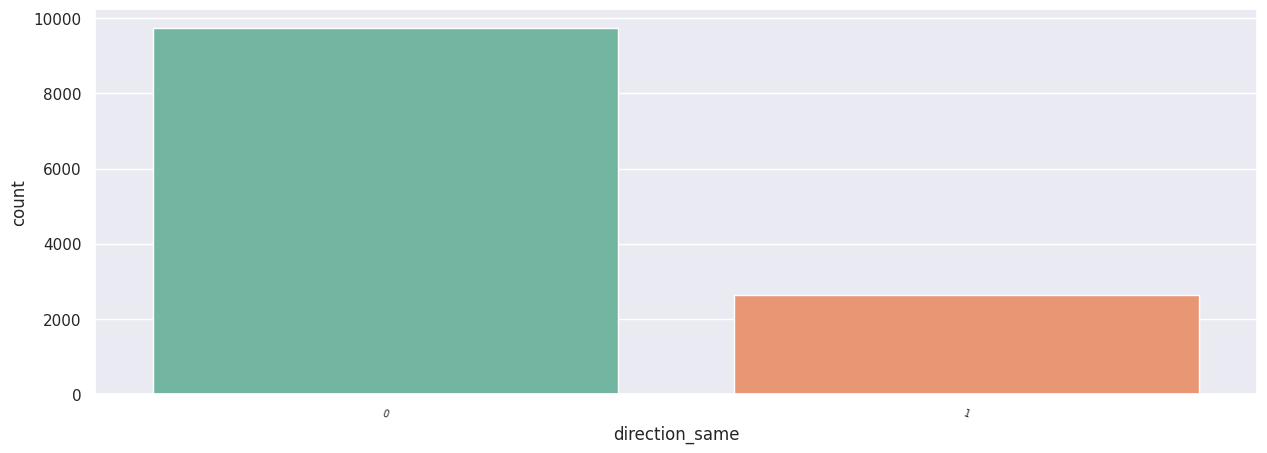

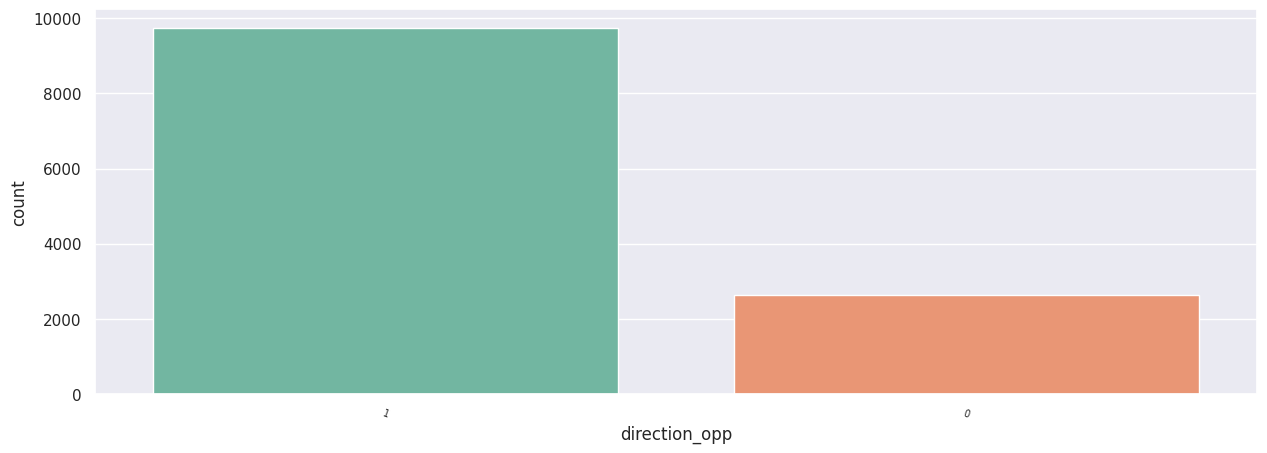

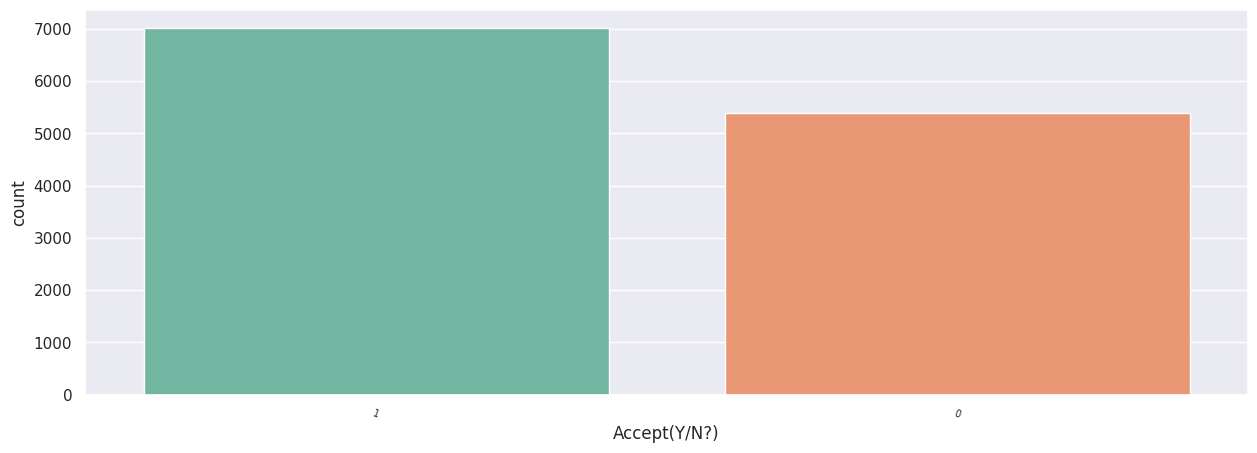

In [27]:
for i in df.columns:
  plt.figure(figsize=(15,5))
  sns.countplot(x = i , data = df,palette="Set2",order=df[i].value_counts(ascending=False).index)
  plt.xticks(rotation=-20,fontsize=7)
  plt.show()

In [28]:
# Analysis of Coupon Acceptance rate w.r.t various attribute

                 Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
destination                                                            
Home                     3161      1594      1567  50.427080  49.572920
No Urgent Place          6118      3865      2253  63.174240  36.825760
Work                     3114      1553      1561  49.871548  50.128452


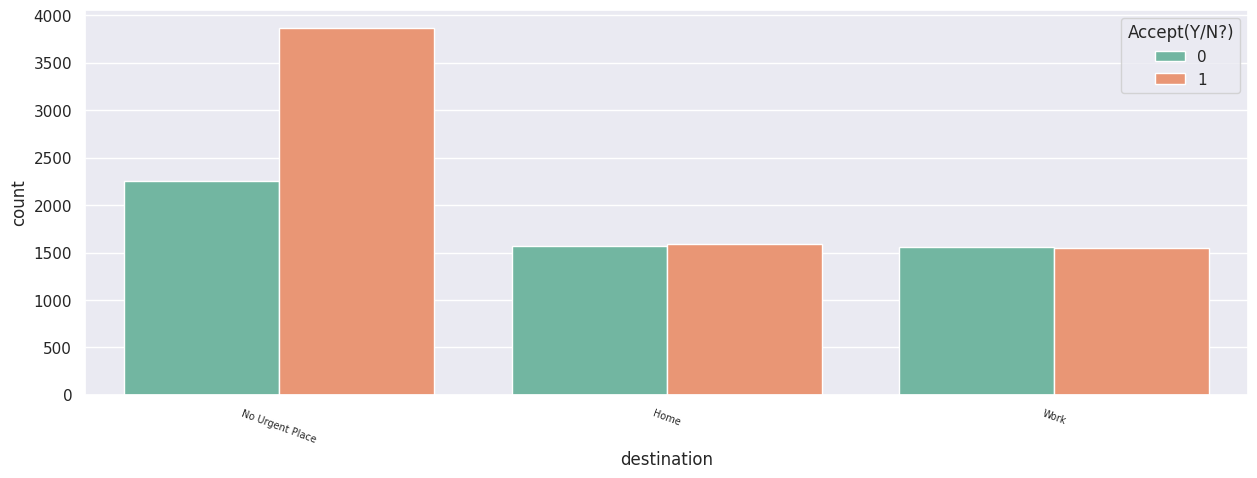






           Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
passanger                                                        
Alone              7178      3760      3418  52.382279  47.617721
Friend(s)          3166      2127      1039  67.182565  32.817435
Kid(s)              981       491       490  50.050968  49.949032
Partner            1068       634       434  59.363296  40.636704


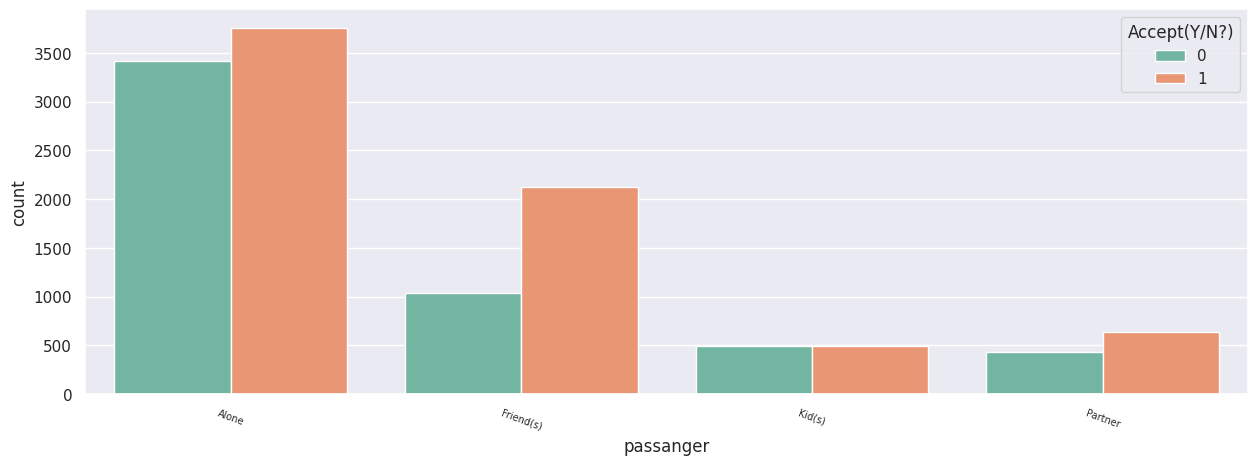






         Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
weather                                                        
Rainy            1202       557       645  46.339434  53.660566
Snowy            1329       605       724  45.522950  54.477050
Sunny            9862      5850      4012  59.318597  40.681403


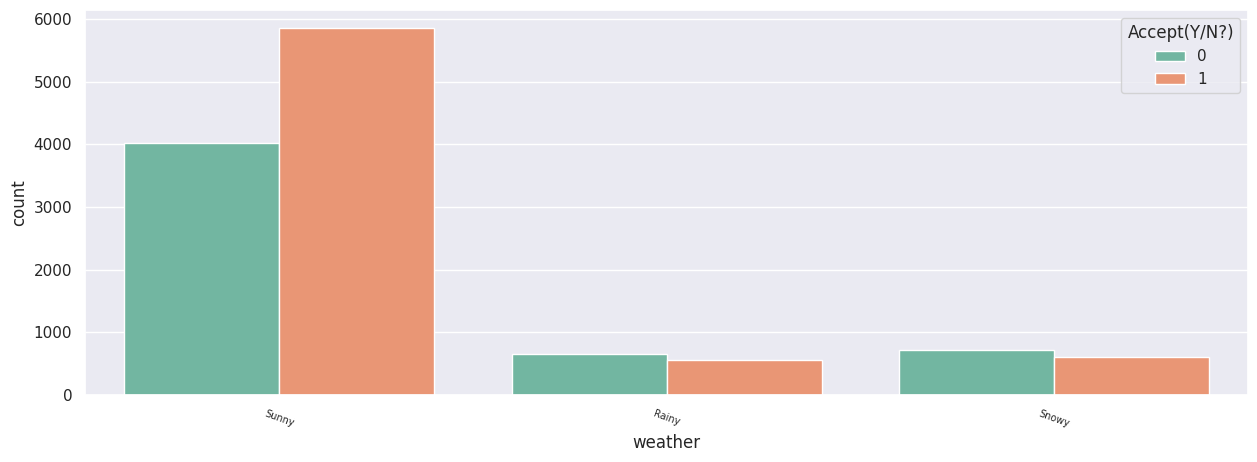






             Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
temperature                                                        
30                   2237      1171      1066  52.346893  47.653107
55                   3828      2055      1773  53.683386  46.316614
80                   6328      3786      2542  59.829330  40.170670


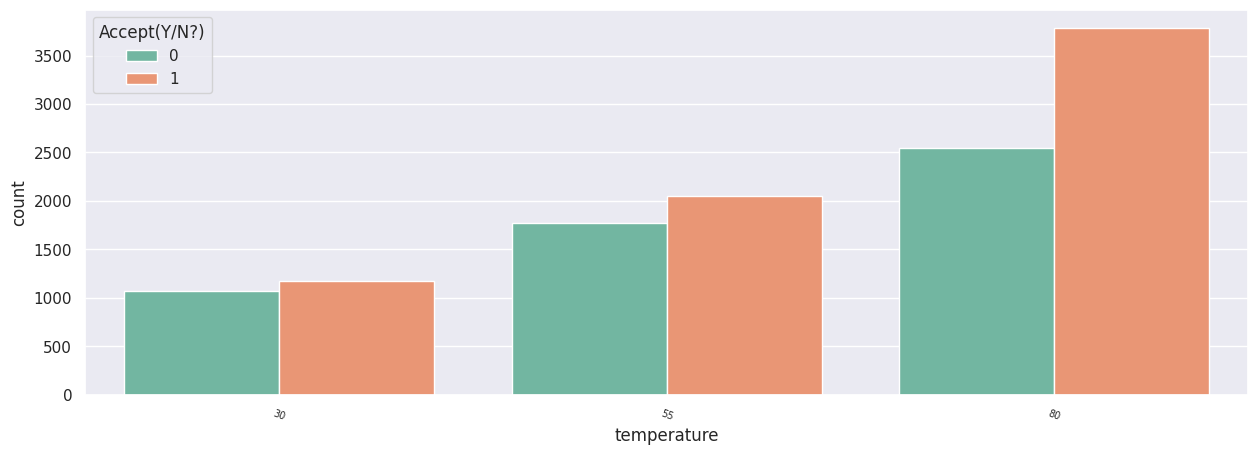






                       Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
coupon                                                                       
Bar                            2010       824      1186  40.995025  59.004975
Carry out & Take away          2275      1665       610  73.186813  26.813187
Coffee House                   3913      1943      1970  49.654996  50.345004
Restaurant(20-50)              1487       656       831  44.115669  55.884331
Restaurant(<20)                2708      1924       784  71.048744  28.951256


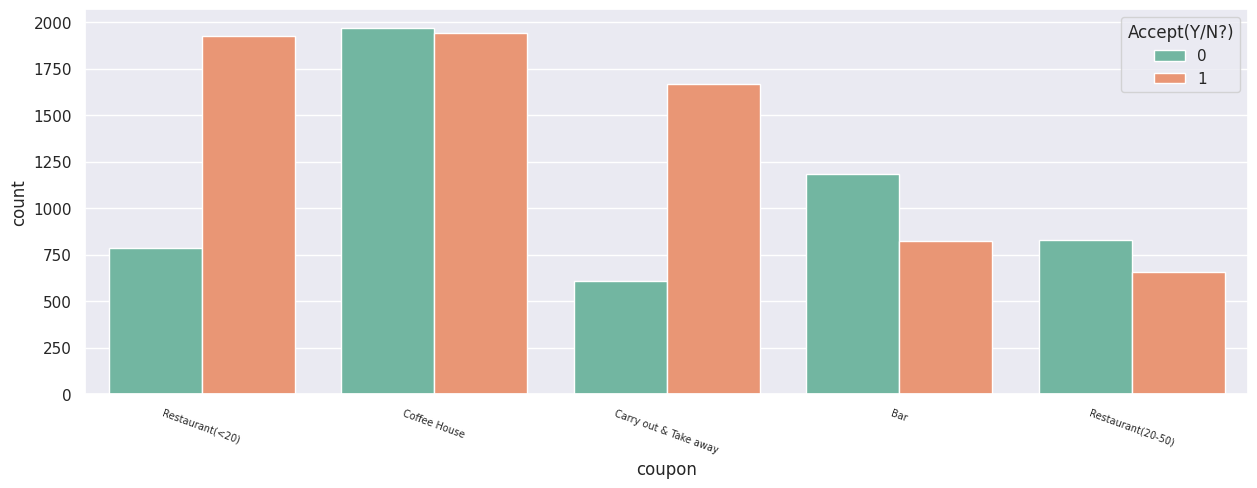






            Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
expiration                                                        
1d                  6938      4317      2621  62.222543  37.777457
2h                  5455      2695      2760  49.404216  50.595784


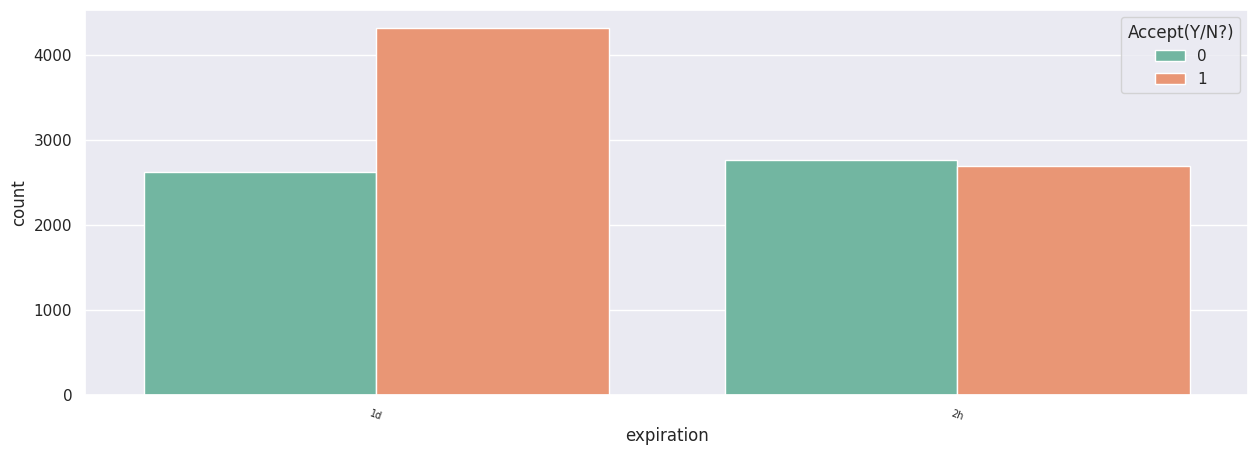






        Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
gender                                                        
Female          6355      3460      2895  54.445319  45.554681
Male            6038      3552      2486  58.827426  41.172574


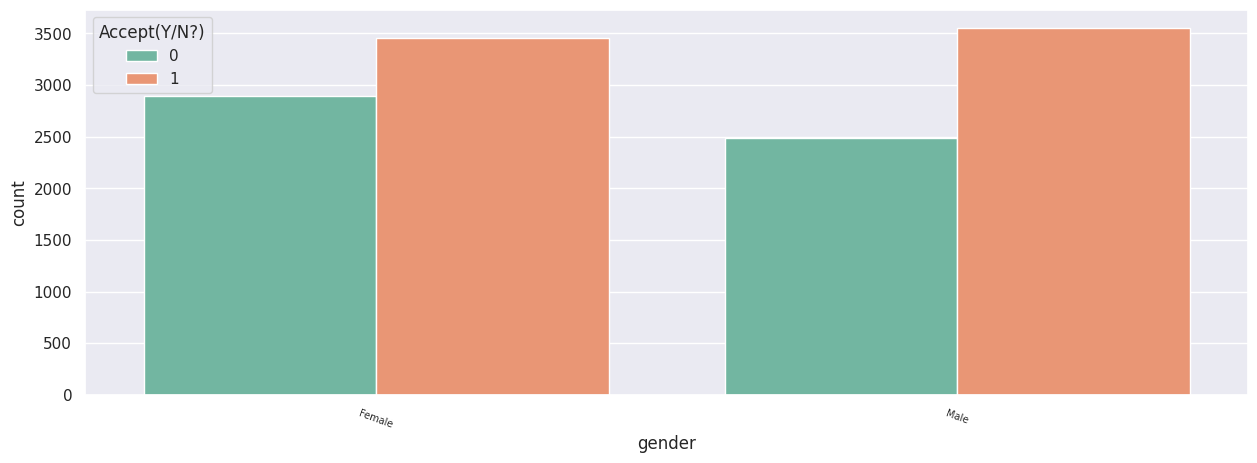






         Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
age                                                            
21               2598      1549      1049  59.622787  40.377213
26               2486      1475      1011  59.332261  40.667739
31               1984      1079       905  54.385081  45.614919
36               1293       687       606  53.132251  46.867749
41               1079       618       461  57.275255  42.724745
46                660       378       282  57.272727  42.727273
50plus           1756       888       868  50.569476  49.430524
below21           537       338       199  62.942272  37.057728


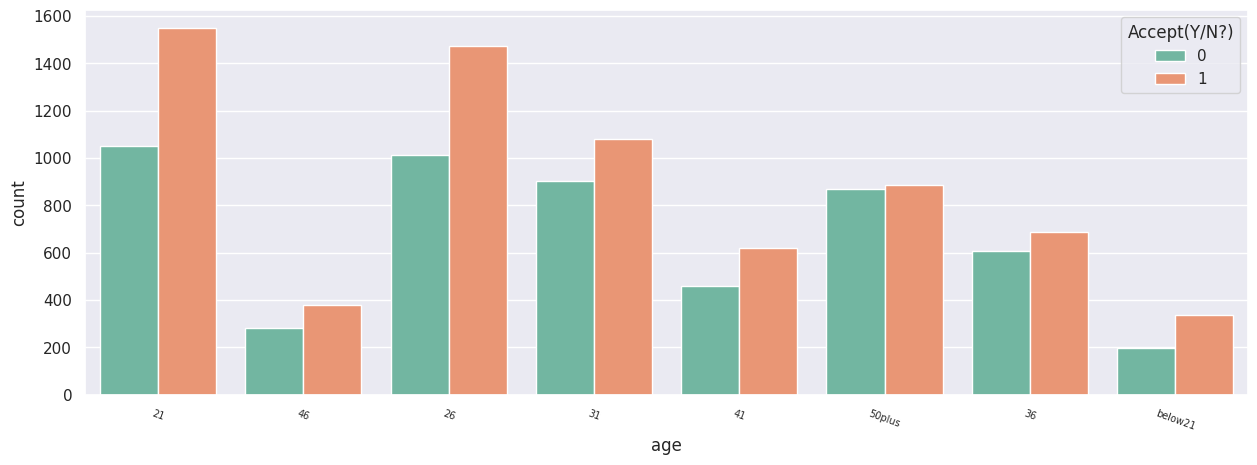






                   Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
maritalStatus                                                            
Divorced                    505       266       239  52.673267  47.326733
Married partner            4994      2697      2297  54.004806  45.995194
Single                     4610      2784      1826  60.390456  39.609544
Unmarried partner          2155      1203       952  55.823666  44.176334
Widowed                     129        62        67  48.062016  51.937984


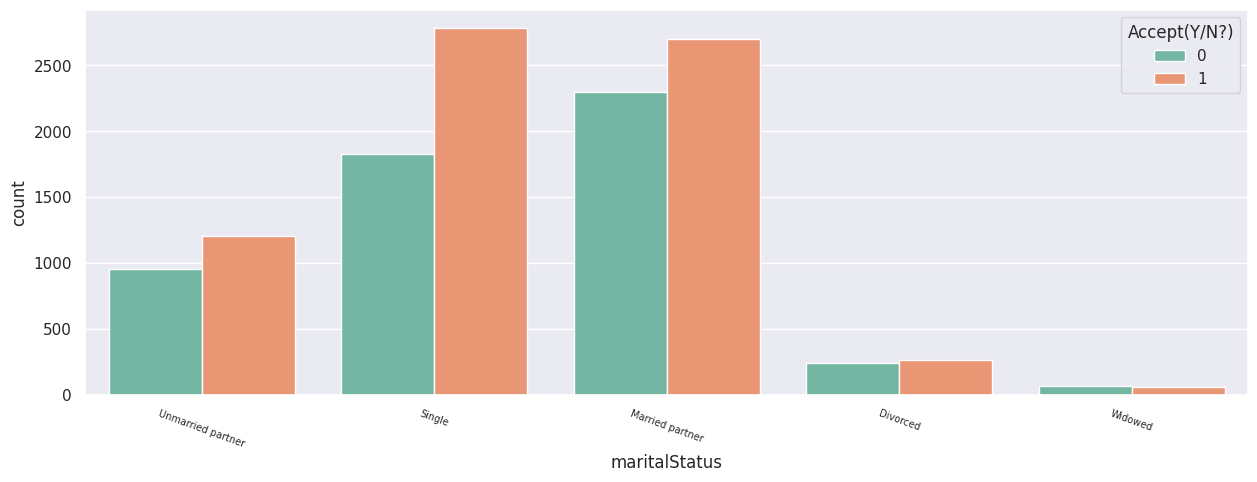






              Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
has_children                                                        
0                     7243      4234      3009  58.456441  41.543559
1                     5150      2778      2372  53.941748  46.058252


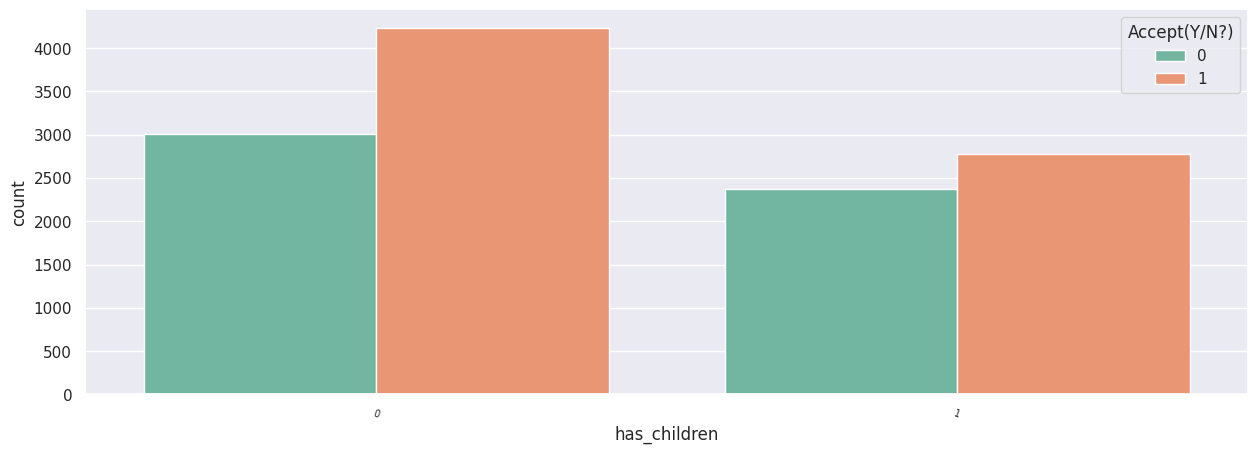






                                        Accept(Y/N?)  accepted  rejected  \
education                                                                  
Associates degree                               1126       614       512   
Bachelors degree                                4247      2344      1903   
Graduate degree (Masters or Doctorate)          1793       939       854   
High School Graduate                             880       519       361   
Some High School                                  87        62        25   
Some college - no degree                        4260      2534      1726   

                                        %Accepted  %Rejected  
education                                                     
Associates degree                       54.529307  45.470693  
Bachelors degree                        55.191900  44.808100  
Graduate degree (Masters or Doctorate)  52.370329  47.629671  
High School Graduate                    58.977273  41.022727  
Some Hig

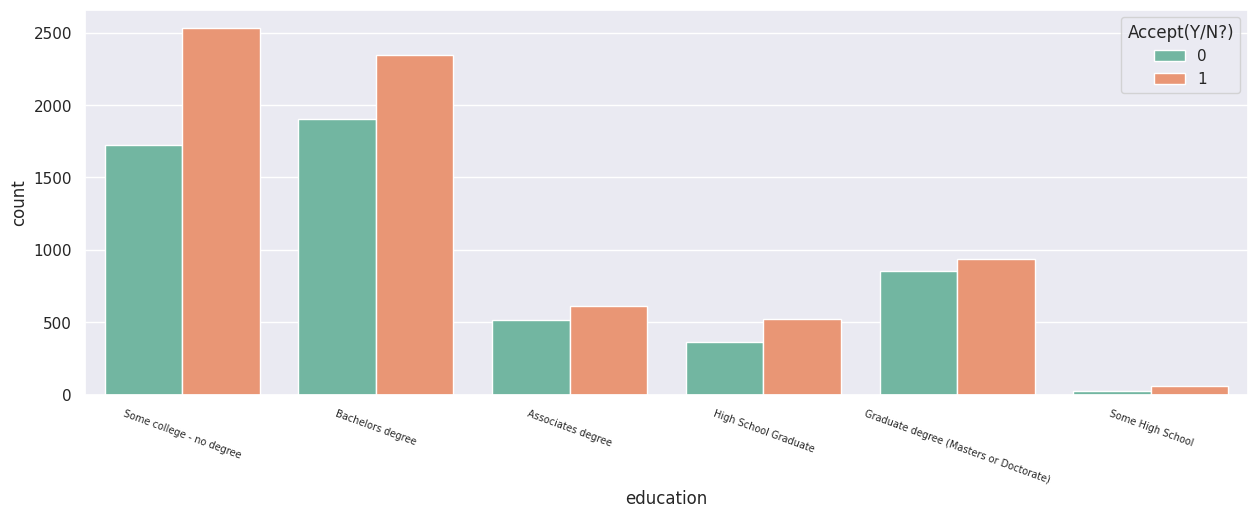






                                           Accept(Y/N?)  accepted  rejected  \
occupation                                                                    
Architecture & Engineering                          172       110        62   
Arts Design Entertainment Sports & Media            617       319       298   
Building & Grounds Cleaning & Maintenance            42        24        18   
Business & Financial                                536       305       231   
Community & Social Services                         236       115       121   
Computer & Mathematical                            1360       768       592   
Construction & Extraction                           150       103        47   
Education&Training&Library                          921       477       444   
Farming Fishing & Forestry                           41        21        20   
Food Preparation & Serving Related                  293       170       123   
Healthcare Practitioners & Technical           

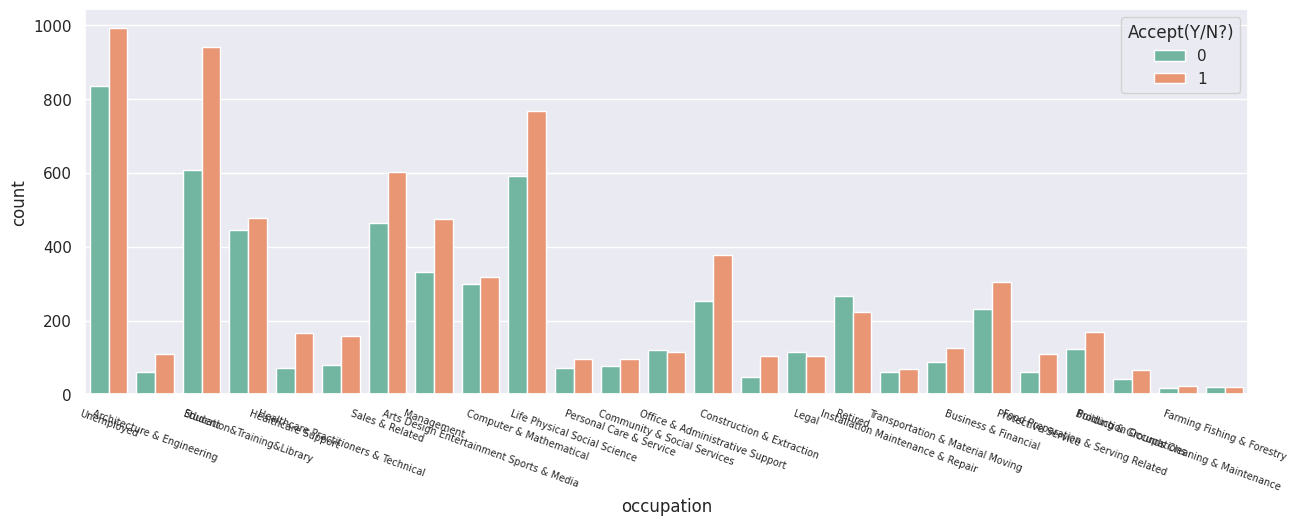






                  Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
income                                                                  
$100000 or More           1688       974       714  57.701422  42.298578
$12500 - $24999           1795      1029       766  57.325905  42.674095
$25000 - $37499           1972      1165       807  59.077079  40.922921
$37500 - $49999           1760       987       773  56.079545  43.920455
$50000 - $62499           1624       964       660  59.359606  40.640394
$62500 - $74999            832       437       395  52.524038  47.475962
$75000 - $87499            844       407       437  48.222749  51.777251
$87500 - $99999            865       456       409  52.716763  47.283237
Less than $12500          1013       593       420  58.538993  41.461007


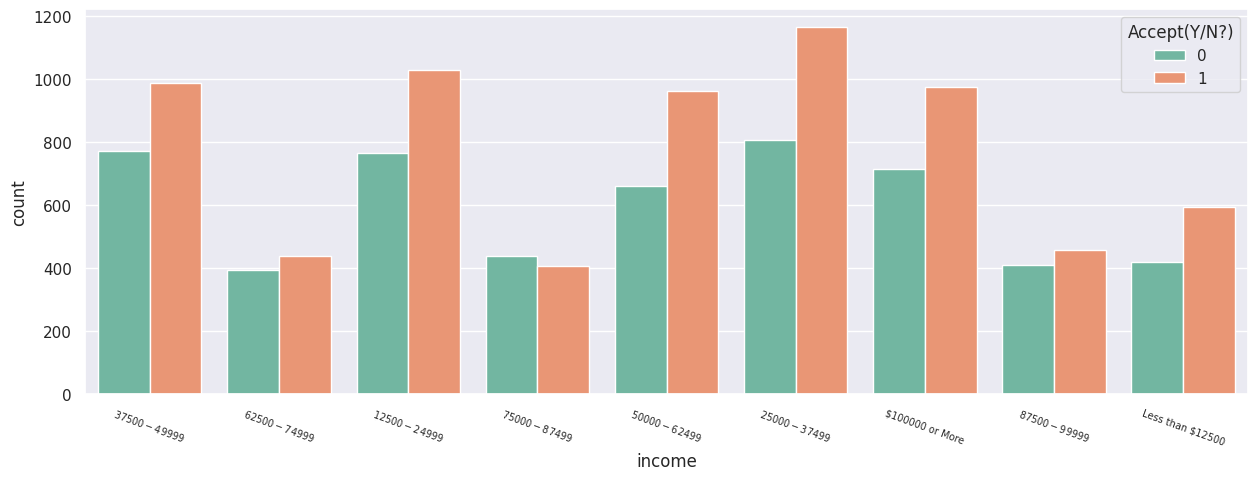






       Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
Bar                                                          
1~3            2432      1508       924  62.006579  37.993421
4~8            1045       661       384  63.253589  36.746411
gt8             338       196       142  57.988166  42.011834
less1          3383      1902      1481  56.222288  43.777712
never          5195      2745      2450  52.839269  47.160731


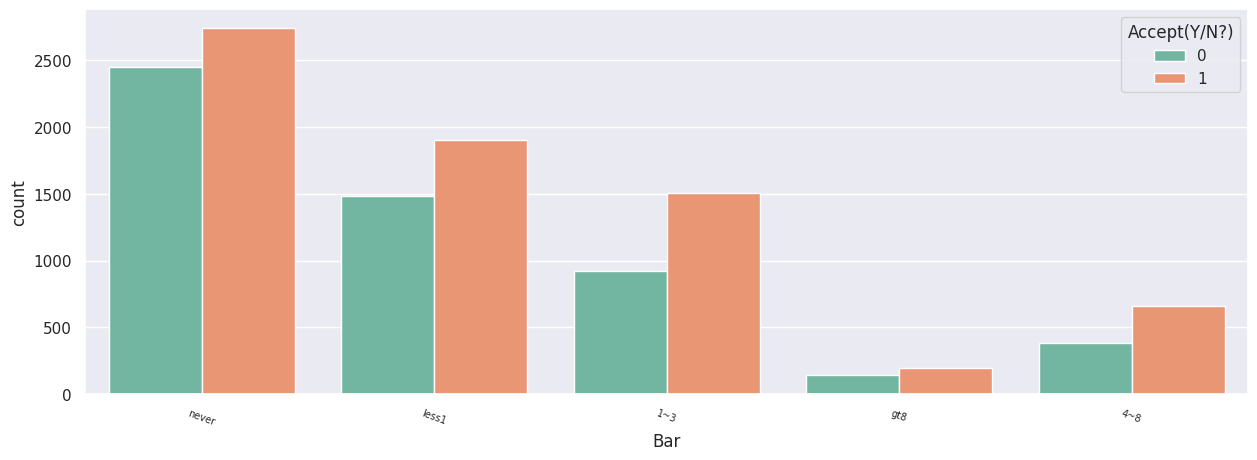






             Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
CoffeeHouse                                                        
1~3                  3138      2044      1094  65.137030  34.862970
4~8                  1752      1107       645  63.184932  36.815068
gt8                  1083       631       452  58.264081  41.735919
less1                3525      1911      1614  54.212766  45.787234
never                2895      1319      1576  45.561313  54.438687


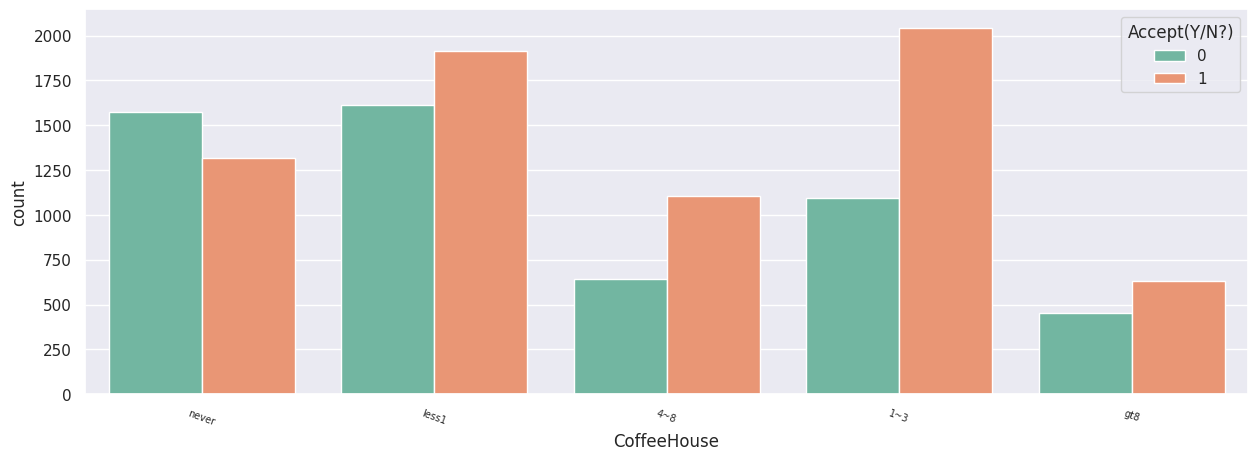






           Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
CarryAway                                                        
1~3                4719      2743      1976  58.126722  41.873278
4~8                4171      2409      1762  57.755934  42.244066
gt8                1535       876       659  57.068404  42.931596
less1              1819       906       913  49.807587  50.192413
never               149        78        71  52.348993  47.651007


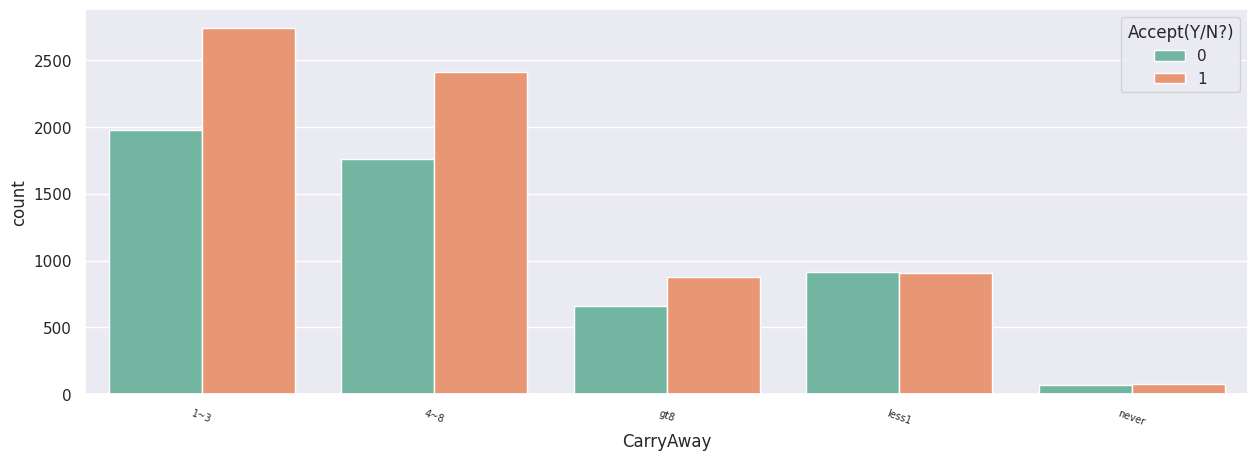






                      Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
RestaurantLessThan20                                                        
1~3                           5397      3024      2373  56.031128  43.968872
4~8                           3493      2032      1461  58.173490  41.826510
gt8                           1253       759       494  60.574621  39.425379
less1                         2034      1082       952  53.195674  46.804326
never                          216       115       101  53.240741  46.759259


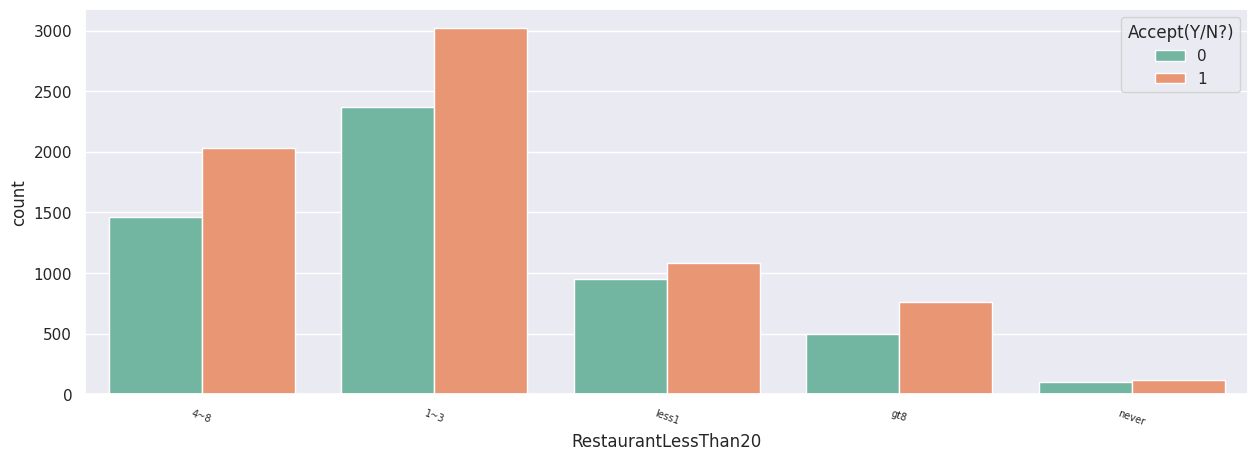






                  Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
Restaurant20To50                                                        
1~3                       3204      1895      1309  59.144819  40.855181
4~8                        718       470       248  65.459610  34.540390
gt8                        254       170        84  66.929134  33.070866
less1                     6134      3407      2727  55.542876  44.457124
never                     2083      1070      1013  51.368219  48.631781


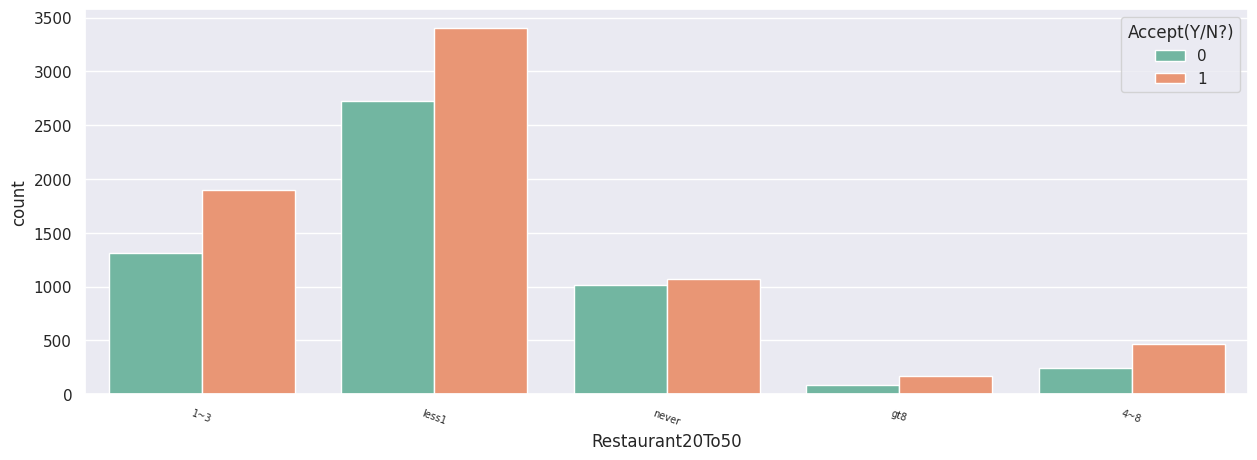






                  Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
toCoupon_GEQ5min                                                        
1                        12393      7012      5381  56.580328  43.419672


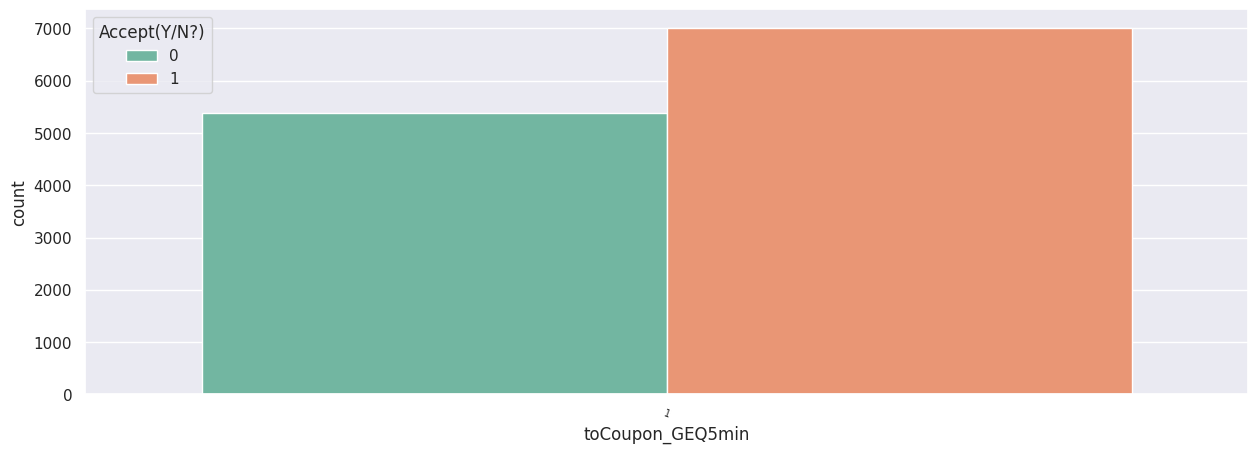






                   Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
toCoupon_GEQ15min                                                        
0                          5408      3322      2086  61.427515  38.572485
1                          6985      3690      3295  52.827487  47.172513


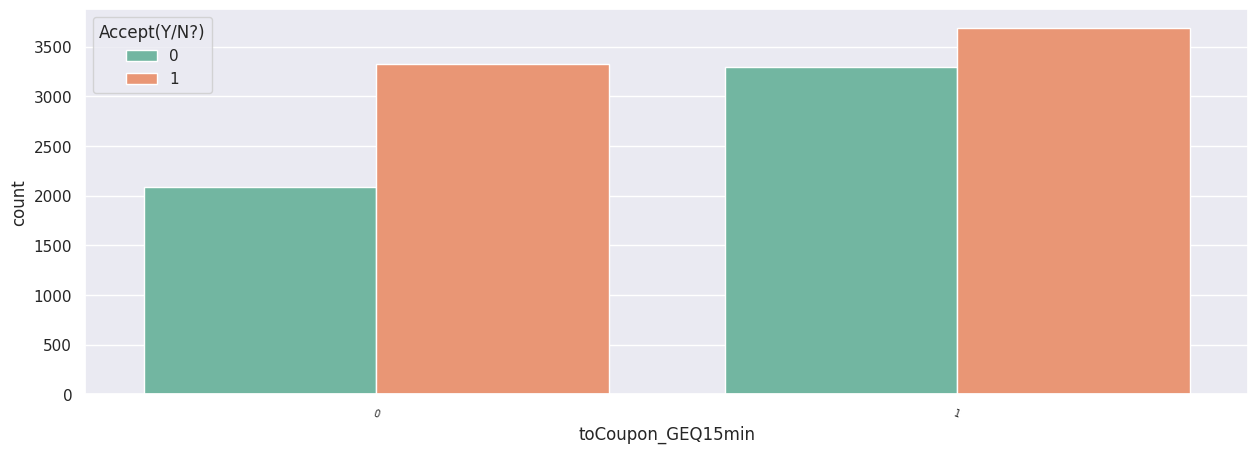






                   Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
toCoupon_GEQ25min                                                        
0                         10930      6398      4532  58.536139  41.463861
1                          1463       614       849  41.968558  58.031442


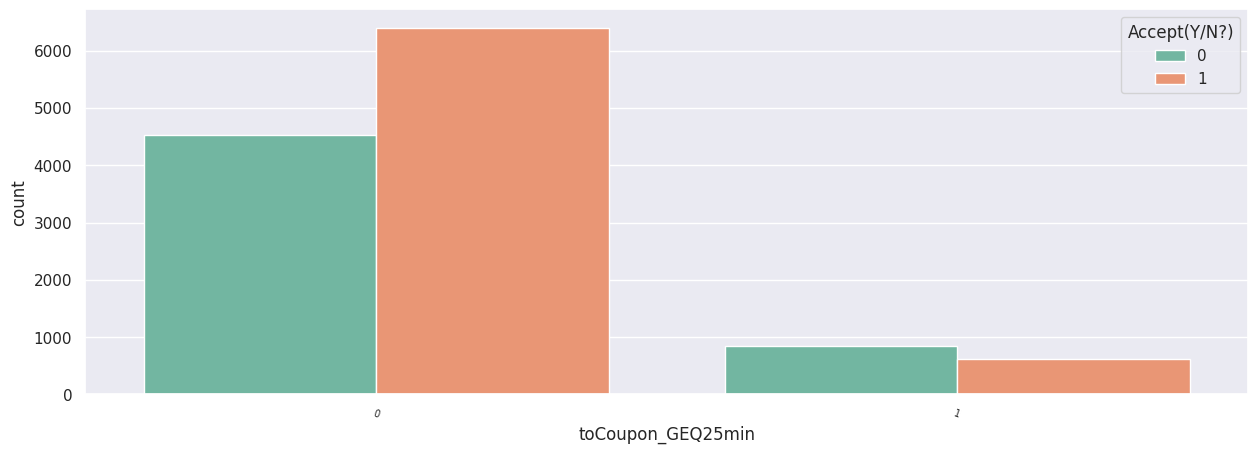






                Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
direction_same                                                        
0                       9744      5472      4272  56.157635  43.842365
1                       2649      1540      1109  58.135145  41.864855


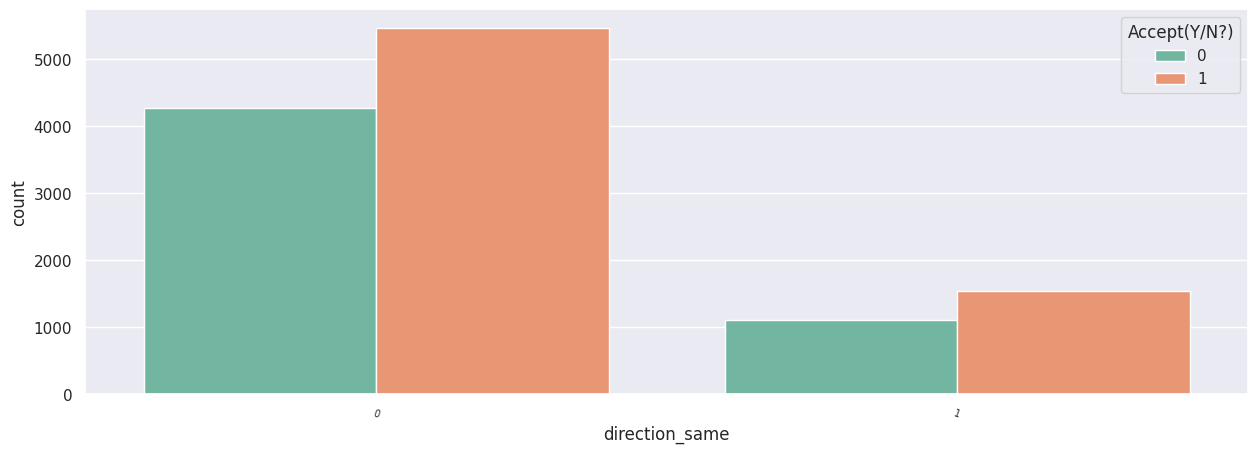






               Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
direction_opp                                                        
0                      2649      1540      1109  58.135145  41.864855
1                      9744      5472      4272  56.157635  43.842365


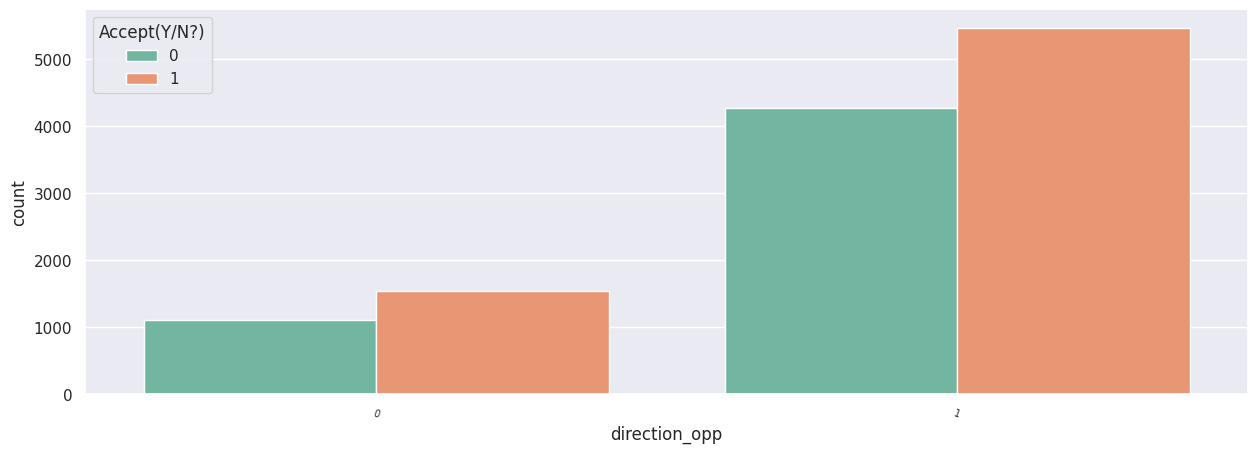






              Accept(Y/N?)  accepted  rejected  %Accepted  %Rejected
Accept(Y/N?)                                                        
0                     5381       NaN    5381.0        NaN      100.0
1                     7012    7012.0       NaN      100.0        NaN


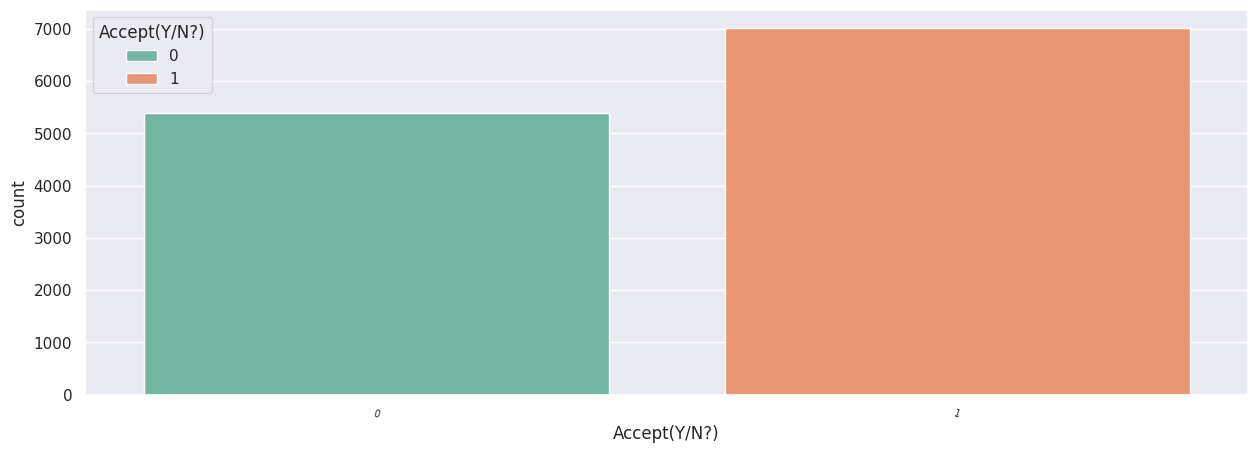

In [29]:
for i in df.columns:
  a=pd.DataFrame(df.groupby(df[i])['Accept(Y/N?)'].count())
  a['accepted']=df[df['Accept(Y/N?)']==1].groupby(df[i])['Accept(Y/N?)'].count()
  a['rejected']=df[df['Accept(Y/N?)']==0].groupby(df[i])['Accept(Y/N?)'].count()
  a['%Accepted']=(a['accepted']/a['Accept(Y/N?)'])*100
  a['%Rejected']=(a['rejected']/a['Accept(Y/N?)'])*100
  print(a)
  plt.figure(figsize=(15,5))
  sns.countplot(x = i ,hue='Accept(Y/N?)', data = df,palette="Set2")
  plt.xticks(rotation=-20,fontsize=7)
  plt.show()
  print()
  print(end='\n\n\n\n')

In [30]:
Driving_time=[]
for i in range(df.shape[0]):
  if (df['toCoupon_GEQ15min'][i])==0:
    Driving_time.append('<15 mins')
  elif ((df['toCoupon_GEQ15min'][i]==1) and (df['toCoupon_GEQ25min'][i])==0):
    Driving_time.append('15~25 mins')
  else:
    Driving_time.append('>25 mins')

In [31]:
df['Driving_time']=Driving_time
df.drop(columns=['toCoupon_GEQ5min','toCoupon_GEQ15min', 'toCoupon_GEQ25min'],axis=1,inplace=True)

In [32]:
a=pd.DataFrame(df.groupby(df['Driving_time'])['Accept(Y/N?)'].count())
a['accepted']=df[df['Accept(Y/N?)']==1].groupby(df['Driving_time'])['Accept(Y/N?)'].count()
a['rejected']=df[df['Accept(Y/N?)']==0].groupby(df['Driving_time'])['Accept(Y/N?)'].count()
a['%Accepted']=(a['accepted']/a['Accept(Y/N?)'])*100
a['%Rejected']=(a['rejected']/a['Accept(Y/N?)'])*100
a

,Accept(Y/N?),accepted,rejected,%Accepted,%Rejected
Driving_time,,,,,
15~25 mins,5522,3076,2446,55.704455,44.295545
<15 mins,5408,3322,2086,61.427515,38.572485
>25 mins,1463,614,849,41.968558,58.031442


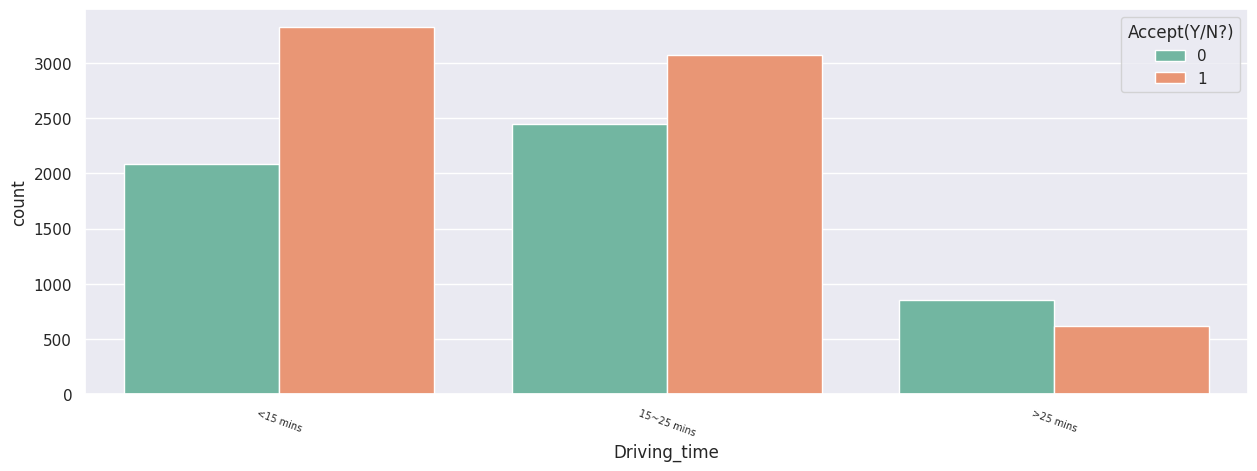

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Driving_time' ,hue='Accept(Y/N?)', data = df,palette="Set2")
plt.xticks(rotation=-20,fontsize=7)
plt.show()
print()

In [34]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'direction_opp', 'Accept(Y/N?)', 'Driving_time'],
      dtype='object')

Data preprocessing

In [35]:
# importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [36]:
# Encoding

In [37]:
for i in df.select_dtypes(include='object').columns:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])

In [38]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept(Y/N?),Driving_time
0,1,0,2,55,4,0,0,0,3,1,5,24,3,4,4,0,1,0,0,1,1,1
1,1,1,2,80,2,1,0,0,3,1,5,24,3,4,4,0,1,0,0,1,0,1
2,1,1,2,80,1,1,0,0,3,1,5,24,3,4,4,0,1,0,0,1,1,0
3,1,1,2,80,2,1,0,0,3,1,5,24,3,4,4,0,1,0,0,1,0,0
4,1,1,2,80,2,0,0,0,3,1,5,24,3,4,4,0,1,0,0,1,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393 entries, 0 to 12392
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12393 non-null  int64
 1   passanger             12393 non-null  int64
 2   weather               12393 non-null  int64
 3   temperature           12393 non-null  int64
 4   coupon                12393 non-null  int64
 5   expiration            12393 non-null  int64
 6   gender                12393 non-null  int64
 7   age                   12393 non-null  int64
 8   maritalStatus         12393 non-null  int64
 9   has_children          12393 non-null  int64
 10  education             12393 non-null  int64
 11  occupation            12393 non-null  int64
 12  income                12393 non-null  int64
 13  Bar                   12393 non-null  int64
 14  CoffeeHouse           12393 non-null  int64
 15  CarryAway             12393 non-null  int64
 16  Rest

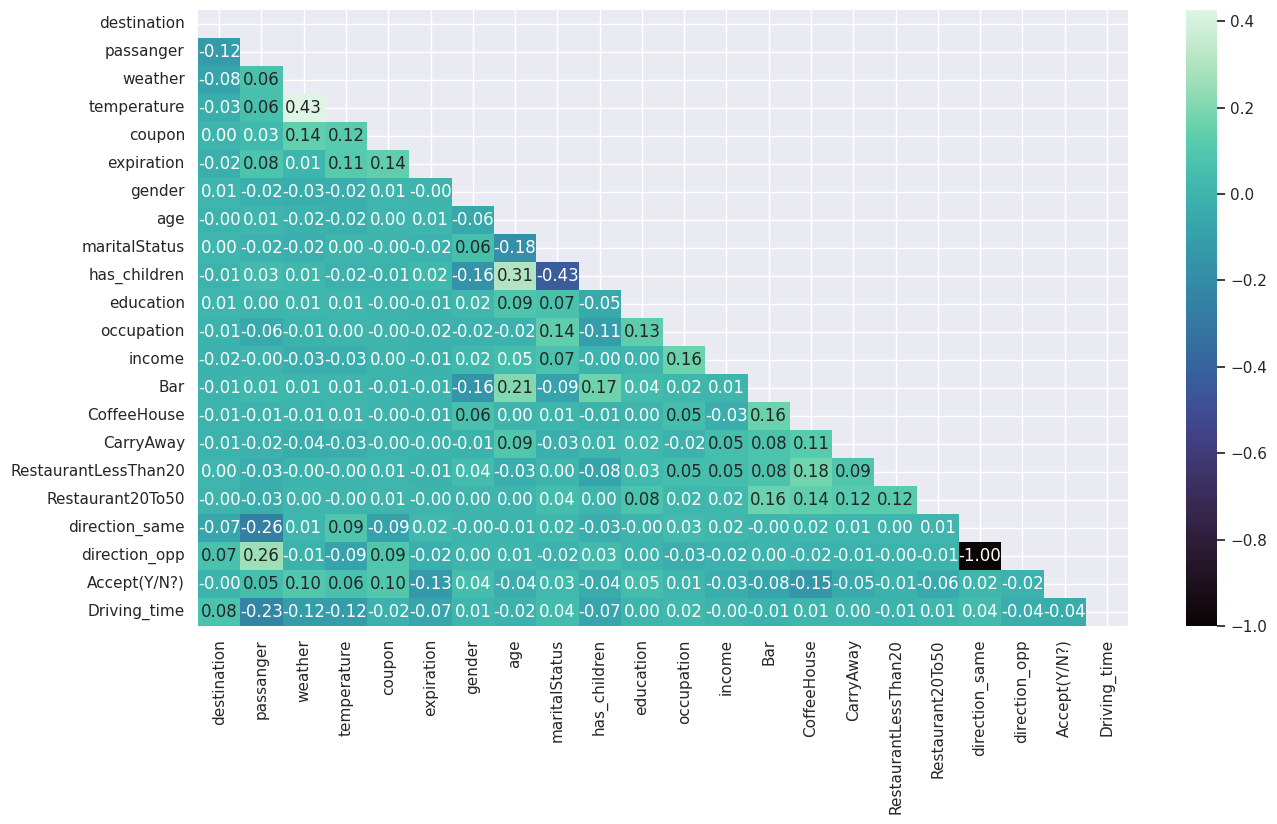

In [40]:
# checking for correlation between features
corr=df.corr()
mask=np.triu(corr)
mask=mask
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,mask=mask,cmap='mako',fmt='.2f')
plt.show()

In [41]:
# Spliting independent and dependent variables

In [42]:
x=df.drop(columns=['Accept(Y/N?)'],axis=1)
y=df['Accept(Y/N?)']

In [43]:
print(x.shape,'  ',y.shape)

(12393, 21)    (12393,)


In [44]:
#importing libabry to split the original dataset into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [45]:
print('Train dataset size: ',x_train.shape)
print('Test dataset size: ',x_test.shape)

Train dataset size:  (9914, 21)
Test dataset size:  (2479, 21)


In [46]:
# scaling all the independent variables using Standard scaler

In [47]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [48]:
x_test_scaled

array([[ 1.40879075, -0.70576498,  0.4771059 , ..., -0.51715644,
         0.51715644,  0.47358224],
       [ 1.40879075, -0.70576498, -2.64605545, ...,  1.93365088,
        -1.93365088,  0.47358224],
       [-1.39465194, -0.70576498,  0.4771059 , ...,  1.93365088,
        -1.93365088,  0.47358224],
       ...,
       [-1.39465194,  2.46553916,  0.4771059 , ..., -0.51715644,
         0.51715644,  1.94632198],
       [ 0.0070694 ,  0.3513364 ,  0.4771059 , ..., -0.51715644,
         0.51715644, -0.9991575 ],
       [ 1.40879075, -0.70576498,  0.4771059 , ..., -0.51715644,
         0.51715644, -0.9991575 ]])

In [49]:
# Model Building

# Model-1  Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train_scaled,y_train)
y_train_pred=logit.predict(x_train_scaled)
y_test_pred=logit.predict(x_test_scaled)

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
print(f'Train accuracy: {accuracy_score(y_train_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_pred,y_test)}')

Train accuracy: 0.625075650595118
Test accuracy: 0.63654699475595


In [53]:
print(classification_report(y_train_pred,y_train))
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51      3246
           1       0.76      0.64      0.70      6668

    accuracy                           0.63      9914
   macro avg       0.60      0.62      0.60      9914
weighted avg       0.66      0.63      0.64      9914

              precision    recall  f1-score   support

           0       0.44      0.61      0.51       771
           1       0.79      0.65      0.71      1708

    accuracy                           0.64      2479
   macro avg       0.61      0.63      0.61      2479
weighted avg       0.68      0.64      0.65      2479



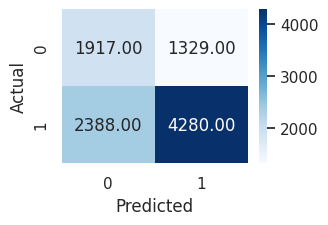

In [54]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

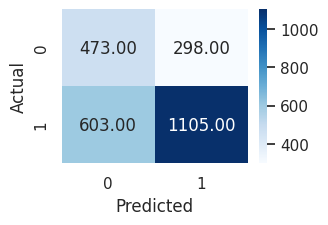

In [55]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model-2  Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
#approach-1 Gini
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train_scaled,y_train)
y_train_dt1_pred=dt1.predict(x_train_scaled)
y_test_dt1_pred=dt1.predict(x_test_scaled)

#approach-2 Entropy
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train_scaled,y_train)
y_train_dt2_pred=dt2.predict(x_train_scaled)
y_test_dt2_pred=dt2.predict(x_test_scaled)

In [57]:
print(f'Train accuracy(gini approach): {accuracy_score(y_train_dt1_pred,y_train)}')
print(f'Test accuracy(gini approach): {accuracy_score(y_test_dt1_pred,y_test)}')
print(f'Train accuracy(entropy approach): {accuracy_score(y_train_dt2_pred,y_train)}')
print(f'Test accuracy(entropy approach): {accuracy_score(y_test_dt2_pred,y_test)}')

Train accuracy(gini approach): 0.9910227960459955
Test accuracy(gini approach): 0.6732553448971359
Train accuracy(entropy approach): 0.9910227960459955
Test accuracy(entropy approach): 0.6885841064945543


In [58]:
# Due to overfitting issue using Cross Validation technique
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(dt1,x_train_scaled,y_train,cv=10)
print(accuracy)
print(accuracy.mean())
print(accuracy.max())

[0.67237903 0.70362903 0.68649194 0.6733871  0.66801211 0.68012109
 0.68113017 0.67103935 0.66902119 0.68920283]
0.6794413837440187
0.7036290322580645


In [59]:
print(classification_report(y_train_dt1_pred,y_train))
print(classification_report(y_test_dt1_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4394
           1       0.98      1.00      0.99      5520

    accuracy                           0.99      9914
   macro avg       0.99      0.99      0.99      9914
weighted avg       0.99      0.99      0.99      9914

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1078
           1       0.71      0.71      0.71      1401

    accuracy                           0.67      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.67      0.67      0.67      2479



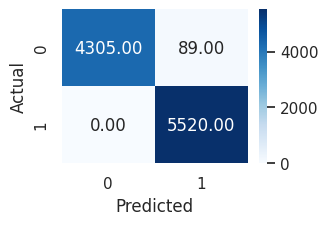

In [60]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_dt1_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

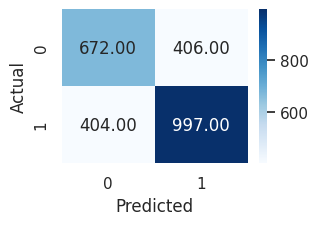

In [61]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_dt1_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
pd.DataFrame(index=x.columns,data=dt1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
destination,0.046366
passanger,0.047009
weather,0.019894
temperature,0.036921
coupon,0.108099
expiration,0.034554
gender,0.024737
age,0.062127
maritalStatus,0.043302
has_children,0.014640


In [63]:
# Hyperparameter tuning

In [64]:
pruned_tree=DecisionTreeClassifier(criterion='gini',max_depth=10)
pruned_tree.fit(x_train_scaled,y_train)
y_train_pt_pred=pruned_tree.predict(x_train_scaled)
y_test_pt_pred=pruned_tree.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_pt_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_pt_pred,y_test)}')

Train accuracy: 0.7974581400040347
Test accuracy: 0.7018959257765228


In [65]:
pruned_tree1=DecisionTreeClassifier(criterion='entropy',max_depth=10)
pruned_tree1.fit(x_train_scaled,y_train)
y_train_pt1_pred=pruned_tree1.predict(x_train_scaled)
y_test_pt1_pred=pruned_tree1.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_pt1_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_pt1_pred,y_test)}')

Train accuracy: 0.7865644543070406
Test accuracy: 0.7022993142396128


# Model-3 Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
bgc.fit(x_train_scaled,y_train)
y_train_bgc_pred=bgc.predict(x_train_scaled)
y_test_bgc_pred=bgc.predict(x_test_scaled)

In [67]:
print(f'Train accuracy: {accuracy_score(y_train_bgc_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_bgc_pred,y_test)}')

Train accuracy: 0.9785152309864837
Test accuracy: 0.7301331181928197


In [68]:
# Due to overfitting issue using cross validation technique
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(bgc,x_train_scaled,y_train,cv=10)
print(accuracy)
print(accuracy.mean())
print(accuracy.max())

[0.68951613 0.74092742 0.69657258 0.70362903 0.72048436 0.71039354
 0.71644803 0.70131181 0.71241171 0.71745711]
0.7109151720321605
0.7409274193548387


In [69]:
print(classification_report(y_train_bgc_pred,y_train))
print(classification_report(y_test_bgc_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4362
           1       0.98      0.99      0.98      5552

    accuracy                           0.98      9914
   macro avg       0.98      0.98      0.98      9914
weighted avg       0.98      0.98      0.98      9914

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1109
           1       0.75      0.77      0.76      1370

    accuracy                           0.73      2479
   macro avg       0.73      0.73      0.73      2479
weighted avg       0.73      0.73      0.73      2479



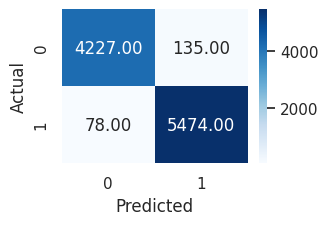

In [70]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_bgc_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

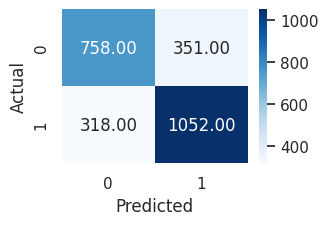

In [71]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_bgc_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model-4 AdaBoost**

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train_scaled,y_train)
y_train_abc_pred=abc.predict(x_train_scaled)
y_test_abc_pred=abc.predict(x_test_scaled)

In [73]:
print(f'Train accuracy: {accuracy_score(y_train_abc_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_abc_pred,y_test)}')

Train accuracy: 0.6794432116199314
Test accuracy: 0.6861637757160145


In [74]:
print(classification_report(y_train_abc_pred,y_train))
print(classification_report(y_test_abc_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60      3617
           1       0.78      0.69      0.73      6297

    accuracy                           0.68      9914
   macro avg       0.66      0.67      0.67      9914
weighted avg       0.70      0.68      0.68      9914

              precision    recall  f1-score   support

           0       0.58      0.66      0.61       940
           1       0.77      0.70      0.74      1539

    accuracy                           0.69      2479
   macro avg       0.67      0.68      0.67      2479
weighted avg       0.70      0.69      0.69      2479



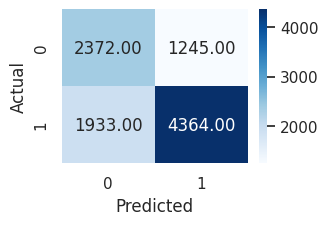

In [75]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_abc_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

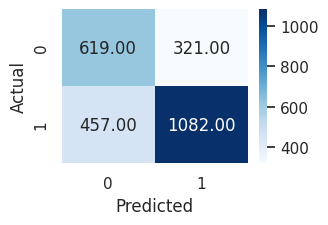

In [76]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_abc_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model-5 Gradient Boosting**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train_scaled,y_train)
y_train_gbc_pred=gbc.predict(x_train_scaled)
y_test_gbc_pred=abc.predict(x_test_scaled)

In [78]:
print(f'Train accuracy: {accuracy_score(y_train_gbc_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_gbc_pred,y_test)}')

Train accuracy: 0.7296752067782933
Test accuracy: 0.6861637757160145


In [79]:
print(classification_report(y_train_gbc_pred,y_train))
print(classification_report(y_test_gbc_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66      3543
           1       0.83      0.73      0.78      6371

    accuracy                           0.73      9914
   macro avg       0.71      0.73      0.72      9914
weighted avg       0.75      0.73      0.73      9914

              precision    recall  f1-score   support

           0       0.58      0.66      0.61       940
           1       0.77      0.70      0.74      1539

    accuracy                           0.69      2479
   macro avg       0.67      0.68      0.67      2479
weighted avg       0.70      0.69      0.69      2479



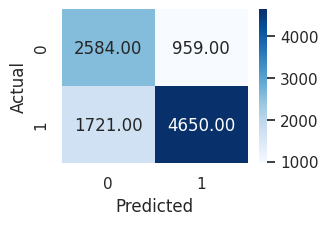

In [80]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_gbc_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

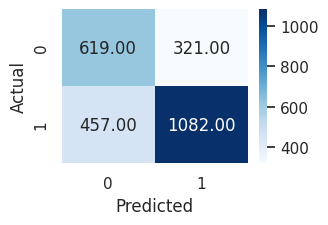

In [81]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_gbc_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model 6 - XGBoost**

In [82]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.5 MB/s eta 0:00:00


In [83]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)
y_train_xgb_pred=xgb.predict(x_train_scaled)
y_test_xgb_pred=abc.predict(x_test_scaled)

In [84]:
print(f'Train accuracy: {accuracy_score(y_train_xgb_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_xgb_pred,y_test)}')

Train accuracy: 0.9183982247327013
Test accuracy: 0.6861637757160145


In [85]:
print(classification_report(y_train_xgb_pred,y_train))
print(classification_report(y_test_xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4040
           1       0.95      0.91      0.93      5874

    accuracy                           0.92      9914
   macro avg       0.91      0.92      0.92      9914
weighted avg       0.92      0.92      0.92      9914

              precision    recall  f1-score   support

           0       0.58      0.66      0.61       940
           1       0.77      0.70      0.74      1539

    accuracy                           0.69      2479
   macro avg       0.67      0.68      0.67      2479
weighted avg       0.70      0.69      0.69      2479



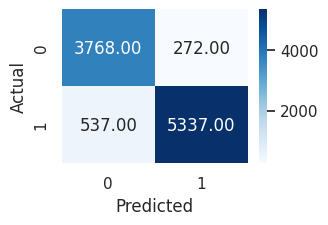

In [86]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train_xgb_pred,y_train),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

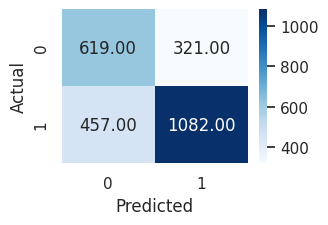

In [87]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test_xgb_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model 7- Random Forest**

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV

In [89]:
rf=RandomForestClassifier(random_state=40)

In [90]:
import time
start = time.time()
param_dict = {'max_depth': [12,14,16,18,20,22],
             'bootstrap': [True, False],
             'max_features':['auto','log2','sqrt'],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf, cv = 10, param_grid = param_dict, n_jobs = 3)

cv_rf.fit(x_train_scaled, y_train)

end = time.time()

print('Time taken to execute: %0.2f'%(end-start))

Time taken to execute: 517.71


In [91]:
print('Best parameter using Grid Search is: \n',cv_rf.best_params_)

Best parameter using Grid Search is: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2'}


In [92]:
# OOB Accuracy = model.oob_score_
#OOB Error = (1 - model.oob_score_)

rf.set_params(warm_start = True, oob_score = True)

min_estimators = 10
max_estimators= 350

error_rate = {}

for i in range(min_estimators, max_estimators + 1):

    rf.set_params(n_estimators = i)
    rf.fit(x_train_scaled, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error



In [ ]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate across various forest sizes')

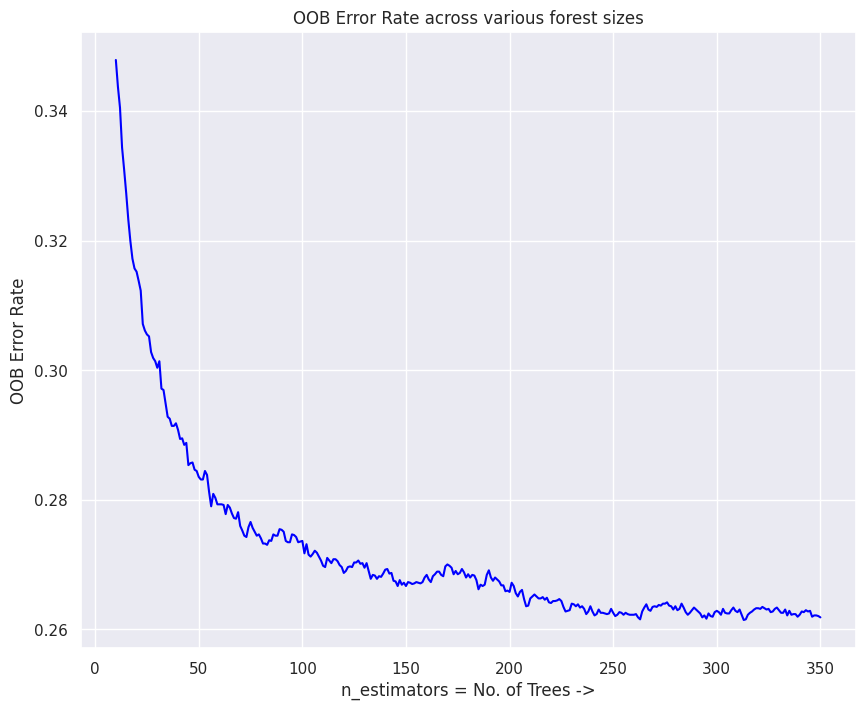

In [94]:
fig, ax = plt.subplots(figsize=(10,8))

oob_series.plot(kind='line', color = 'blue')
plt.xlabel('n_estimators = No. of Trees ->')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate across various forest sizes')

In [137]:
rf.set_params(n_estimators = 350, bootstrap = True,criterion = 'entropy', max_depth= 20, max_features= 'log2', warm_start = False, oob_score= False)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=350, random_state=40)

In [138]:
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=350, random_state=40)

In [139]:
accuracy_train_rf = rf.score(x_train_scaled, y_train)
print(accuracy_train_rf)

0.9910227960459955


In [140]:
accuracy_test_rf = rf.score(x_test_scaled, y_test)
print(accuracy_test_rf)

0.7539330375151271


In [141]:
y_train_rf_pred=rf.predict(x_train_scaled)
y_test_rf_pred=rf.predict(x_test_scaled)

In [142]:
print(f'Train accuracy: {accuracy_score(y_train_rf_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_rf_pred,y_test)}')

Train accuracy: 0.9910227960459955
Test accuracy: 0.7539330375151271


In [143]:
# Due to overfitting issue using cross validation technique
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(rf,x_train_scaled,y_train,cv=10)
print(accuracy)
print(accuracy.mean())
print(accuracy.max())

[0.72479839 0.75100806 0.72479839 0.7641129  0.73360242 0.74772957
 0.74167508 0.73158426 0.73259334 0.74268416]
0.7394586561309853
0.7641129032258065


In [144]:
print(classification_report(y_train_rf_pred,y_train))
print(classification_report(y_test_rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4298
           1       0.99      0.99      0.99      5616

    accuracy                           0.99      9914
   macro avg       0.99      0.99      0.99      9914
weighted avg       0.99      0.99      0.99      9914

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       926
           1       0.84      0.76      0.79      1553

    accuracy                           0.75      2479
   macro avg       0.74      0.75      0.74      2479
weighted avg       0.77      0.75      0.76      2479



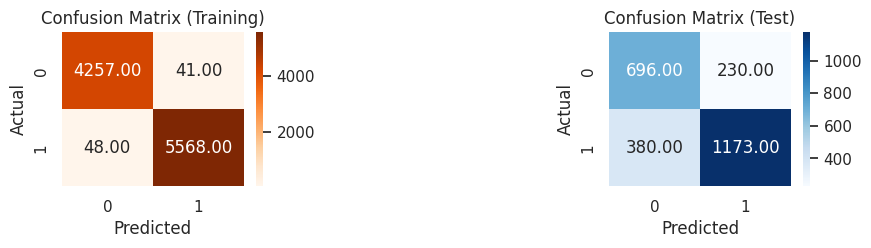

In [145]:
plt.figure(figsize=(10,2))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_train_rf_pred,y_train),annot=True,fmt='.2f',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test_rf_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [146]:
importances = rf.feature_importances_
importances

array([0.04141484, 0.04254839, 0.02281534, 0.04208093, 0.1166    ,
       0.03294061, 0.02428638, 0.06775008, 0.04116955, 0.02017815,
       0.05235234, 0.09213228, 0.07822087, 0.0519955 , 0.05950803,
       0.0488665 , 0.04779003, 0.04475704, 0.01321468, 0.01351019,
       0.04586827])

In [147]:
feature_names= x_train.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feature_importance = feature_importance.sort_values(by='Importance',ascending = False)

Text(0.5, 1.0, 'Feature Importance')

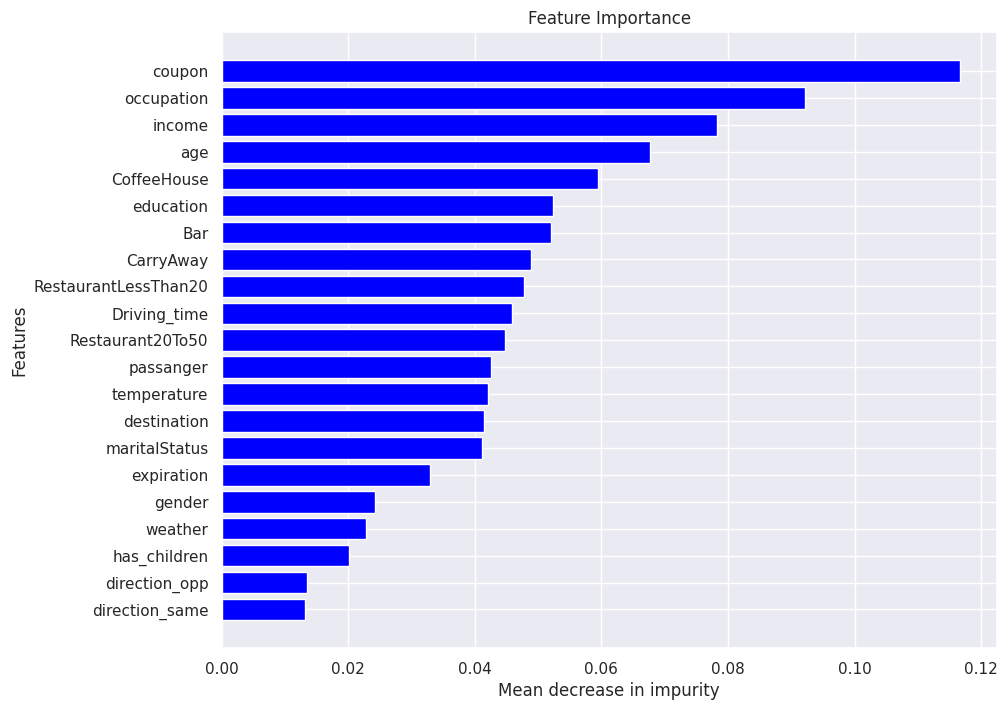

In [148]:
# Plot the feature importance

plt.figure(figsize=(10,8))
plt.barh(feature_importance['Feature'],feature_importance['Importance'], color = 'blue')
plt.gca().invert_yaxis()
plt.xlabel('Mean decrease in impurity')
plt.ylabel('Features')
plt.title('Feature Importance')

In [103]:
# Model 8 - KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled,y_train)
  y_train_knn_pred=knn.predict(x_train)
  y_test_knn_pred=knn.predict(x_test)
  error_rate.append(np.mean(y_test_knn_pred!=y_test))
print(error_rate)

[0.4263816054860831, 0.44251714400968134, 0.41427995159338443, 0.4308188785800726, 0.4126663977410246, 0.4255748285599032, 0.4191206131504639, 0.42315449778136344, 0.41871722468737393, 0.42759177087535294, 0.42718838241226303, 0.42839854780153286, 0.4292053247277128, 0.4300121016538927, 0.43041549011698266, 0.4292053247277128, 0.43162565550625254, 0.4320290439693425, 0.4292053247277128, 0.4300121016538927, 0.4300121016538927, 0.4255748285599032, 0.4223477208551835, 0.42517144009681324, 0.4263816054860831, 0.4211375554659137, 0.4219443323920936, 0.4191206131504639, 0.4235578862444534]


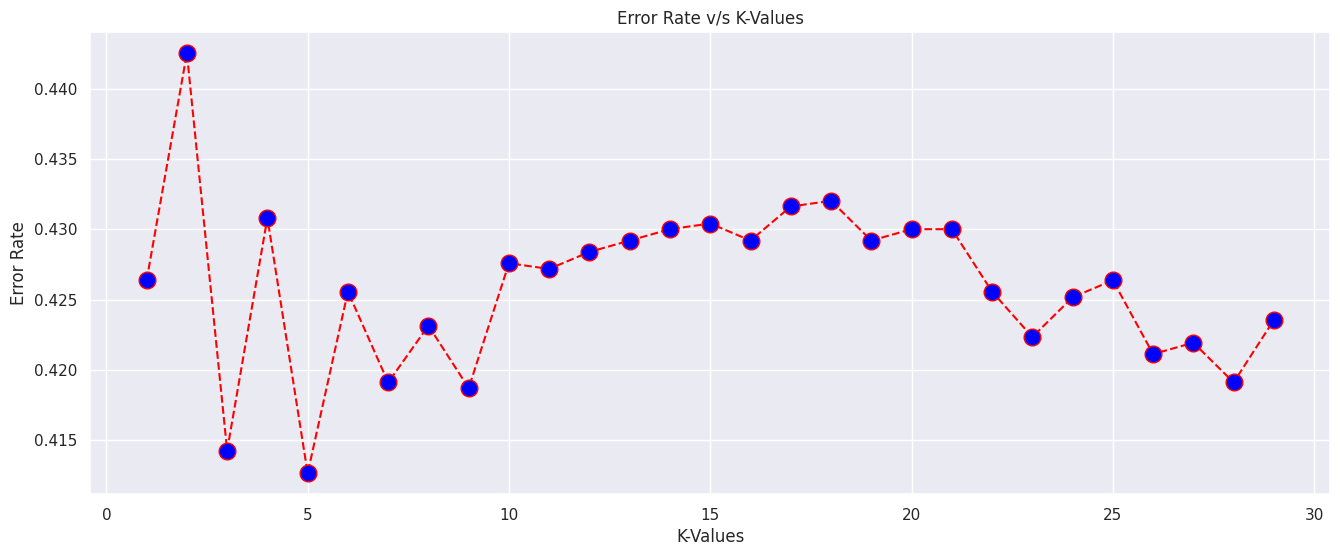

In [105]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=12)
plt.title('Error Rate v/s K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
plt.show()

In [106]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_train_knn_pred=knn.predict(x_train)
y_test_knn_pred=knn.predict(x_test)

In [107]:
print(f'Train accuracy: {accuracy_score(y_train_knn_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_knn_pred,y_test)}')

Train accuracy: 0.579382691143837
Test accuracy: 0.5873336022589754


In [108]:
print(classification_report(y_train_knn_pred,y_train))
print(classification_report(y_test_knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.18      0.55      0.27      1413
           1       0.89      0.58      0.70      8501

    accuracy                           0.58      9914
   macro avg       0.53      0.57      0.49      9914
weighted avg       0.79      0.58      0.64      9914

              precision    recall  f1-score   support

           0       0.17      0.58      0.27       317
           1       0.91      0.59      0.71      2162

    accuracy                           0.59      2479
   macro avg       0.54      0.59      0.49      2479
weighted avg       0.81      0.59      0.66      2479



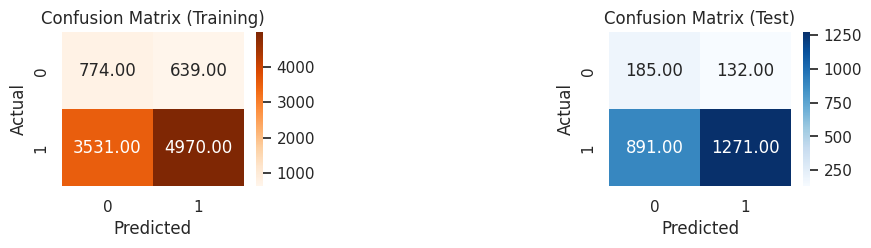

In [109]:
plt.figure(figsize=(10,2))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_train_knn_pred,y_train),annot=True,fmt='.2f',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test_knn_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [110]:
# Model 9 - SVM

In [111]:
from sklearn.svm import SVC

In [112]:
# Kernel - Linear
svc_lr=SVC(kernel='linear')
svc_lr.fit(x_train_scaled,y_train)
y_train_svc_lr_pred=svc_lr.predict(x_train_scaled)
y_test_svc_lr_pred=svc_lr.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_lr_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_lr_pred,y_test)}')

Train accuracy: 0.6275973370990519
Test accuracy: 0.6389673255344898


In [113]:
# Kernel - Sigmoid
svc_sg=SVC(kernel='sigmoid')
svc_sg.fit(x_train_scaled,y_train)
y_train_svc_sg_pred=svc_sg.predict(x_train_scaled)
y_test_svc_sg_pred=svc_sg.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_sg_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_sg_pred,y_test)}')

Train accuracy: 0.5084728666532177
Test accuracy: 0.5421540943929004


In [114]:
# Kernel - Polynomial
svc_pl=SVC(kernel='poly')
svc_pl.fit(x_train_scaled,y_train)
y_train_svc_pl_pred=svc_pl.predict(x_train_scaled)
y_test_svc_pl_pred=svc_pl.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_pl_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_pl_pred,y_test)}')

Train accuracy: 0.753580794835586
Test accuracy: 0.682129891085115


In [115]:
# Kernel - RBF
svc_rbf=SVC(kernel='linear')
svc_rbf.fit(x_train_scaled,y_train)
y_train_svc_rbf_pred=svc_rbf.predict(x_train_scaled)
y_test_svc_rbf_pred=svc_rbf.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_rbf_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_rbf_pred,y_test)}')

Train accuracy: 0.6275973370990519
Test accuracy: 0.6389673255344898


In [116]:
# Kernel = poly is giving better accuracy than other kernel. So using it as final model
final_model=SVC(kernel='poly')
final_model.fit(x_train_scaled,y_train)
y_train_svc_pred=final_model.predict(x_train_scaled)
y_test_svc_pred=final_model.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_pred,y_test)}')

Train accuracy: 0.753580794835586
Test accuracy: 0.682129891085115


In [117]:
print(classification_report(y_train_svc_pred,y_train))
print(classification_report(y_test_svc_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      3426
           1       0.86      0.74      0.80      6488

    accuracy                           0.75      9914
   macro avg       0.74      0.76      0.74      9914
weighted avg       0.78      0.75      0.76      9914

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       860
           1       0.80      0.69      0.74      1619

    accuracy                           0.68      2479
   macro avg       0.66      0.68      0.67      2479
weighted avg       0.71      0.68      0.69      2479



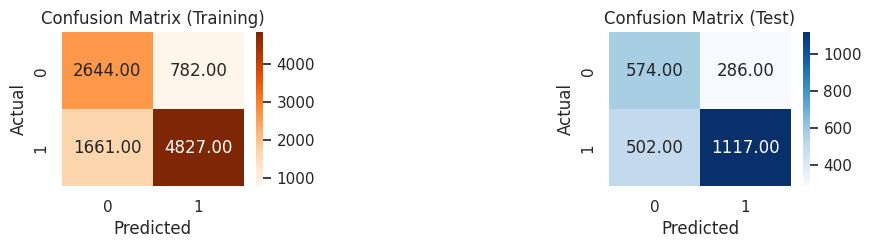

In [118]:
plt.figure(figsize=(10,2))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_train_svc_pred,y_train),annot=True,fmt='.2f',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test_svc_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [119]:
# Model 10 - NaiveBayes

In [120]:
# Gausian NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train_scaled,y_train)
y_train_gnb_pred=gnb.predict(x_train_scaled)
y_test_gnb_pred=gnb.predict(x_test_scaled)

In [121]:
print(f'Train accuracy: {accuracy_score(y_train_gnb_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_gnb_pred,y_test)}')

Train accuracy: 0.6190236029856768
Test accuracy: 0.6446147640177491


In [122]:
# Bernoulli NaiveBayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_scaled,y_train)
y_train_bnb_pred=bnb.predict(x_train_scaled)
y_test_bnb_pred=bnb.predict(x_test_scaled)

In [123]:
print(f'Train accuracy: {accuracy_score(y_train_bnb_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_bnb_pred,y_test)}')

Train accuracy: 0.6208392172685092
Test accuracy: 0.6300927793465106


In [124]:
print(classification_report(y_train_gnb_pred,y_train))
print(classification_report(y_test_gnb_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51      3410
           1       0.74      0.64      0.69      6504

    accuracy                           0.62      9914
   macro avg       0.60      0.61      0.60      9914
weighted avg       0.64      0.62      0.63      9914

              precision    recall  f1-score   support

           0       0.46      0.62      0.53       801
           1       0.78      0.66      0.71      1678

    accuracy                           0.64      2479
   macro avg       0.62      0.64      0.62      2479
weighted avg       0.68      0.64      0.65      2479



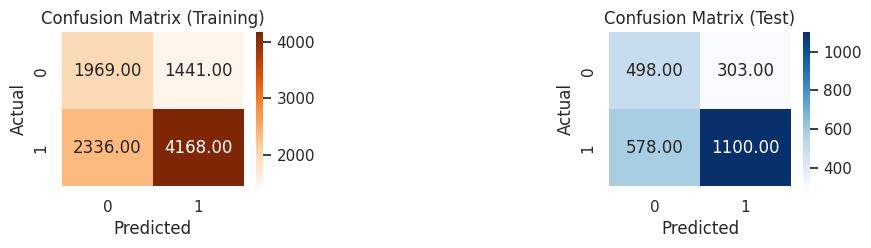

In [125]:
plt.figure(figsize=(10,2))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_train_gnb_pred,y_train),annot=True,fmt='.2f',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test_gnb_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [126]:
# Comparing Models

In [149]:
train_accuracy_logit = accuracy_score(y_train_pred,y_train)
test_accuracy_logit = accuracy_score(y_test_pred,y_test)

train_accuracy_dtree = accuracy_score(y_train_pt_pred,y_train)
test_accuracy_dtree = accuracy_score(y_test_pt_pred,y_test)

train_accuracy_bag = accuracy_score(y_train_bgc_pred,y_train)
test_accuracy_bag = accuracy_score(y_test_bgc_pred,y_test)

train_accuracy_rf = accuracy_score(y_train , y_train_rf_pred)
test_accuracy_rf = accuracy_score(y_test , y_test_rf_pred)

train_accuracy_ada = accuracy_score(y_train_abc_pred,y_train)
test_accuracy_ada = accuracy_score(y_test_abc_pred,y_test)

train_accuracy_gbc = accuracy_score(y_train_gbc_pred,y_train)
test_accuracy_gbc = accuracy_score(y_test_gbc_pred,y_test)

train_accuracy_xgb = accuracy_score(y_train_xgb_pred,y_train)
test_accuracy_xgb = accuracy_score(y_test_xgb_pred,y_test)

train_accuracy_knn = accuracy_score(y_train_knn_pred,y_train)
test_accuracy_knn = accuracy_score(y_test_knn_pred,y_test)

train_accuracy_svm = accuracy_score(y_train_svc_pred,y_train)
test_accuracy_svm = accuracy_score(y_test_svc_pred,y_test)

train_accuracy_ngb = accuracy_score(y_train_gnb_pred,y_train)
test_accuracy_ngb = accuracy_score(y_test_gnb_pred,y_test)


In [152]:
list1 = ['Logit Scaled' , 'Decision Tree' ,'Random Forest', 'Bagging' , 'AdaBoost' , 'Gradient boosting' , 'XG Boost' , 'KNN' , 'Support Vector'  , 'Naives-Guassian']

list2 = [train_accuracy_logit,train_accuracy_dtree,train_accuracy_rf,train_accuracy_bag,train_accuracy_ada,train_accuracy_gbc,train_accuracy_xgb,train_accuracy_knn,train_accuracy_svm,train_accuracy_ngb]

list3 = [test_accuracy_logit,test_accuracy_dtree,test_accuracy_rf,test_accuracy_bag,test_accuracy_ada,test_accuracy_gbc,test_accuracy_xgb,test_accuracy_knn,test_accuracy_svm,test_accuracy_ngb]

In [153]:
accuracy_df = pd.DataFrame({'Train Accuracy':list2,'Test Accuracy':list3},index=list1)
print(accuracy_df)

                   Train Accuracy  Test Accuracy
Logit Scaled             0.625076       0.636547
Decision Tree            0.797458       0.701896
Random Forest            0.991023       0.753933
Bagging                  0.978515       0.730133
AdaBoost                 0.679443       0.686164
Gradient boosting        0.729675       0.686164
XG Boost                 0.918398       0.686164
KNN                      0.579383       0.587334
Support Vector           0.753581       0.682130
Naives-Guassian          0.619024       0.644615


Text(0, 0.5, 'Train Accuracy')

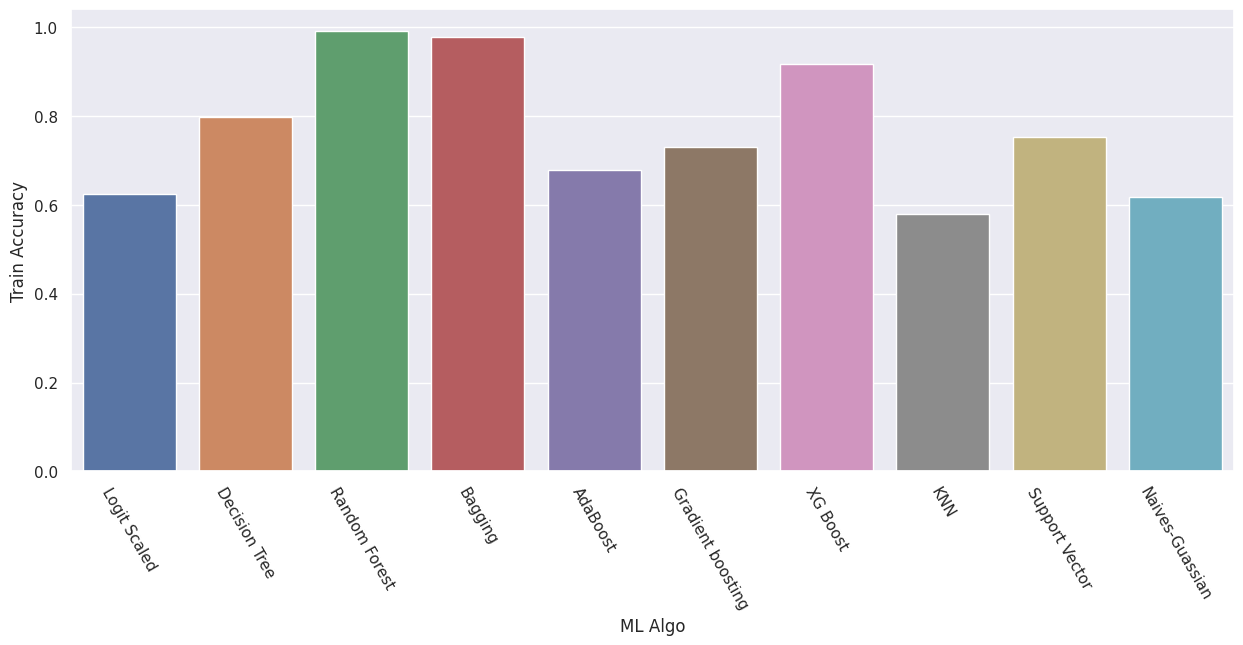

In [154]:
plt.figure(figsize=(15,6))
sns.barplot(x = accuracy_df.index  , y = 'Train Accuracy' ,hue=accuracy_df.index , data = accuracy_df)
plt.xticks(rotation=-60)
plt.xlabel('ML Algo')
plt.ylabel('Train Accuracy')

Text(0, 0.5, 'Test Accuracy')

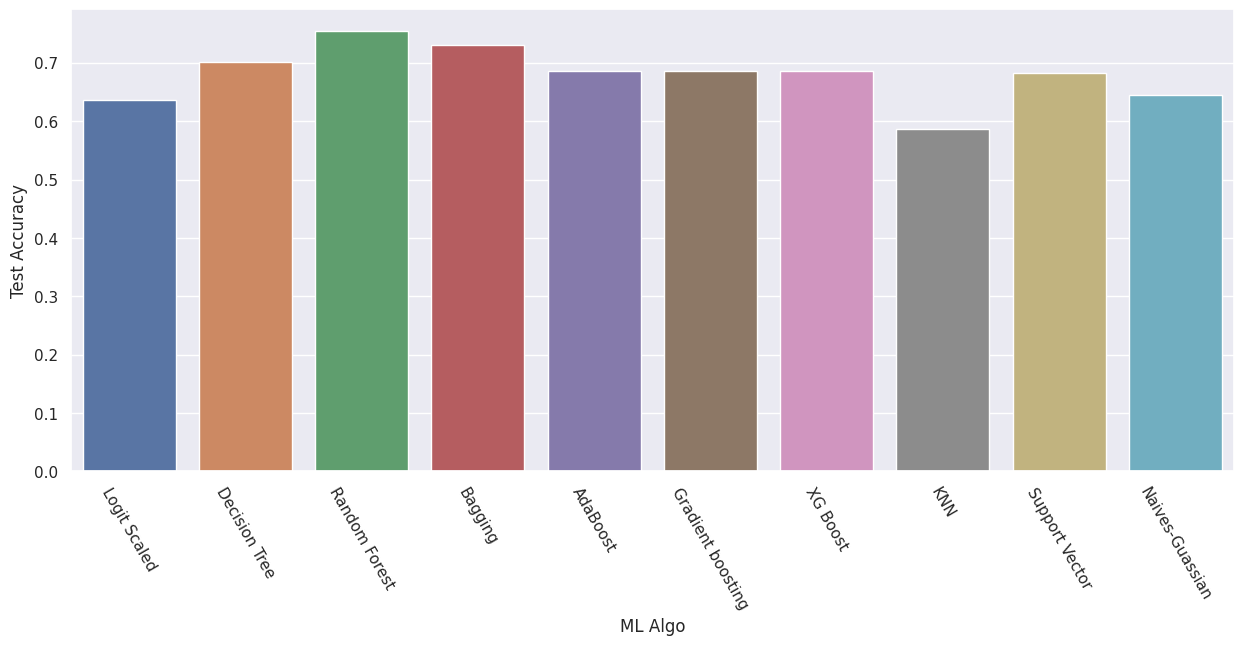

In [155]:
plt.figure(figsize=(15,6))
sns.barplot(x = accuracy_df.index , y = 'Test Accuracy' ,hue=accuracy_df.index, data = accuracy_df)
plt.xticks(rotation=-60)
plt.xlabel('ML Algo')
plt.ylabel('Test Accuracy')

In [156]:
from sklearn.metrics import roc_auc_score,roc_curve

In [157]:
lr_roc_auc = roc_auc_score(y_test , y_test_pred)
dtree_roc_auc = roc_auc_score(y_test , y_test_pt_pred)
rf_roc_auc = roc_auc_score(y_test , y_test_rf_pred)
bgc_roc_auc = roc_auc_score(y_test , y_test_bgc_pred)
ada_roc_auc = roc_auc_score(y_test , y_test_abc_pred)
gbc_roc_auc = roc_auc_score(y_test , y_test_gbc_pred)
xgb_roc_auc = roc_auc_score(y_test , y_test_xgb_pred)
knn_roc_auc = roc_auc_score(y_test , y_test_knn_pred)
svm_roc_auc = roc_auc_score(y_test , y_test_svc_pred)
ngb_roc_auc = roc_auc_score(y_test , y_test_gnb_pred)

In [158]:
fpr,tpr,thresholds = roc_curve(y_test , y_test_gbc_pred)
fpr1,tpr1,thresholds = roc_curve(y_test , y_test_pred)
fpr2,tpr2,thresholds = roc_curve(y_test , y_test_pt_pred)
fpr3,tpr3,thresholds = roc_curve(y_test , y_test_rf_pred)
fpr4,tpr4,thresholds = roc_curve(y_test , y_test_svc_pred)
fpr5,tpr5,thresholds = roc_curve(y_test , y_test_knn_pred)
fpr6,tpr6,thresholds = roc_curve(y_test , y_test_xgb_pred)
fpr7,tpr7,thresholds = roc_curve(y_test , y_test_gnb_pred)
fpr8,tpr8,thresholds = roc_curve(y_test , y_test_bgc_pred)
fpr9,tpr9,thresholds = roc_curve(y_test , y_test_abc_pred)

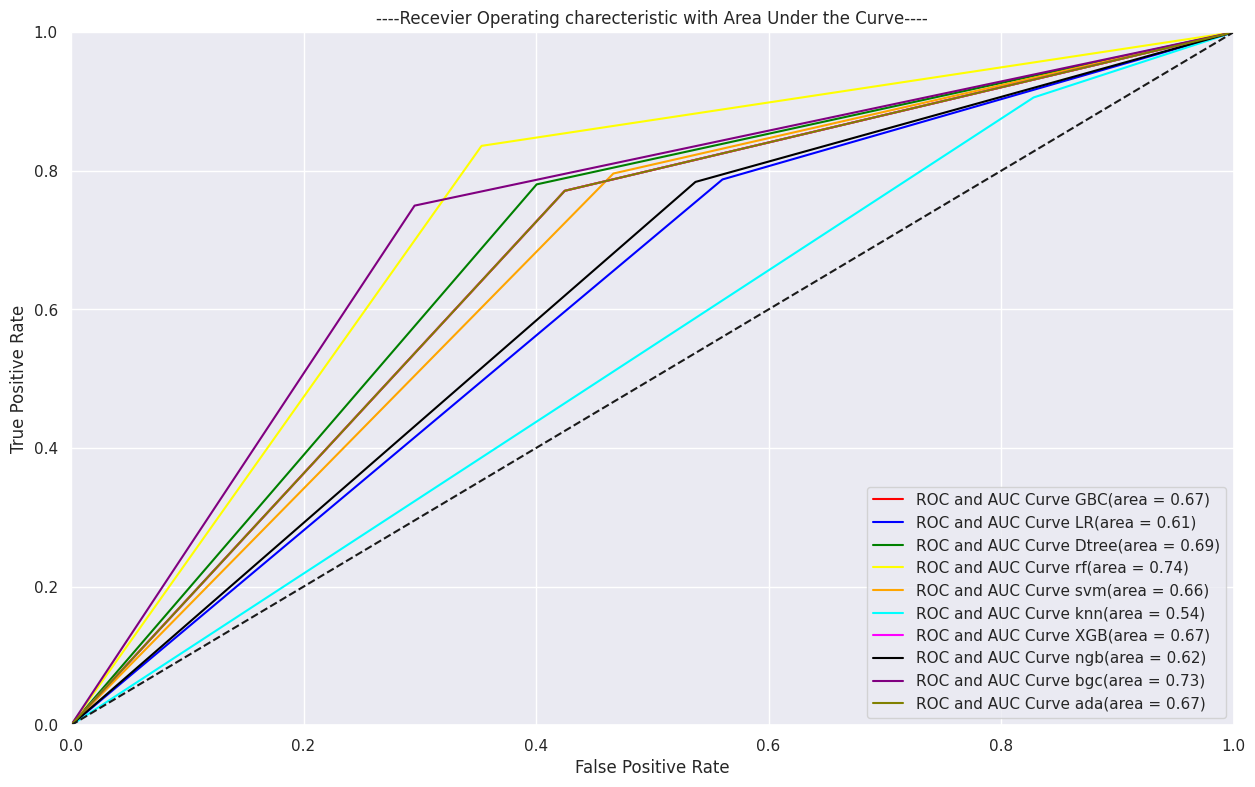

In [159]:
plt.figure(figsize = (15 , 9))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve GBC(area = %0.2f)' %gbc_roc_auc,color = 'red')
plt.plot(fpr1, tpr1, label = 'ROC and AUC Curve LR(area = %0.2f)' %lr_roc_auc , color = 'blue')
plt.plot(fpr2, tpr2, label = 'ROC and AUC Curve Dtree(area = %0.2f)' %dtree_roc_auc , color = 'green')
plt.plot(fpr3, tpr3, label = 'ROC and AUC Curve rf(area = %0.2f)' %rf_roc_auc , color = 'yellow')
plt.plot(fpr4, tpr4, label = 'ROC and AUC Curve svm(area = %0.2f)' %svm_roc_auc , color = 'orange')
plt.plot(fpr5, tpr5, label = 'ROC and AUC Curve knn(area = %0.2f)' %knn_roc_auc , color = 'cyan')
plt.plot(fpr6, tpr6, label = 'ROC and AUC Curve XGB(area = %0.2f)' %xgb_roc_auc , color = 'magenta')
plt.plot(fpr7, tpr7, label = 'ROC and AUC Curve ngb(area = %0.2f)' %ngb_roc_auc , color = 'black')
plt.plot(fpr8, tpr8, label = 'ROC and AUC Curve bgc(area = %0.2f)' %bgc_roc_auc , color = 'purple')
plt.plot(fpr9, tpr9, label = 'ROC and AUC Curve ada(area = %0.2f)' %ada_roc_auc , color = 'olive')
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()